Author :
    
`Akshay Sonune
Tuhin Das`

## Telecom Churn Case Study

### Problem Statement : 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Case Study Objectives:

- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months

- Recommend strategies to manage customer churn based on the observations and give out the best features based on it's importance 

### Steps being followed throught the case study

- **Step 1:** Handling missing data
- **Step 2:** Filtering high value customers (Top 30% customers)
- **Step 3:** Derive churn
- **Step 4:** Exploratory Data Analysis
- **Step 5:** Derive New Features
- **Step 6:** Train-Test Split
- **Step 7:** Feature Scaling
- **Step 8:** Handling Class Imbalance
- **Step 9:** Model Building using Logistic Regression
- **Step 10:** Model Building using Random Forest
- **Step 11:** Recommend Strategies for Business

In [1]:
#importing initial libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

### Model Selection libraries
from sklearn.model_selection import train_test_split

### Feature Scaling Libraries
from sklearn.preprocessing import StandardScaler

### Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Random Forest Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Class Imbalance Libraries
from imblearn.over_sampling import SMOTE

### Importing PCA to deal with Multicollinearity
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
pd.set_option('display.width', 1000)

# Step 1 - Handling missing data

In [2]:
#reading the csv file

df = pd.read_csv("telecom_churn_data.csv")
df.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803  21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN            0.0            NaN            NaN            NaN            0.0            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN               0.0               NaN               NaN               NaN               0.0               NaN           NaN           NaN          0.00           NaN               NaN               NaN               0.0               NaN               NaN               NaN              0.00               NaN               NaN               NaN               0.0               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321  86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76               0.0               0.0               0.0               0.0               0.0              2.91               0.0               0.0         35.39        150.51        299.54         72.11              0.23              4.11               0.0               0.0               0.0              0.46              0.13               0.0               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  \
0               NaN               NaN              

In [3]:
#checking shape of data set

df.shape

(99999, 226)

In [4]:
#checking the concise summary of the dataset
df.info(max_cols=226)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
#checking the null value percentage across all columns

null_perc = round(df.isnull().sum()*100/len(df),2)
pd.set_option('display.max_rows', None)
null_perc

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### Observation:

` We could see many columns with high null values. However, their significance is higher with respect to business problem hence we cannot drop them directly. Instead we will impute them as follows.`

## 1.1 Imputing mising values. 

`There are 3 types of data available in overall dataset. Few columns are date type columns, few are recharge related columns and few are categorical columns. We need to give separate treatment for each type as follows`

### 1.1.1 Treating column - a) mobile_number, b) circle_id

`Dropping the first two columns, i.e., column - "mobile number" which is equivalent to unique id of each customer and column-"circle_id" as only one type of circle_id has been provided.`

In [6]:
df.drop(['mobile_number', 'circle_id'], axis = 1, inplace=True)
df.head(2)

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803  21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN            0.0            NaN            NaN            NaN            0.0            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN               0.0               NaN               NaN               NaN               0.0               NaN           NaN           NaN          0.00           NaN               NaN               NaN               0.0               NaN               NaN               NaN              0.00               NaN               NaN               NaN               0.0               NaN               NaN               NaN   
1             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321  86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76               0.0               0.0               0.0               0.0               0.0              2.91               0.0               0.0         35.39        150.51        299.54         72.11              0.23              4.11               0.0               0.0               0.0              0.46              0.13               0.0               0.0               0.0               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0               0.0      

### 1.1.2 Dropping the columns having unique values

In [7]:
## Dropping the columns having unique value of 0 as such columns will become redundant

df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
         'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis = 1, inplace=True)
df.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  \
0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN           NaN           NaN          0.00           NaN           NaN   
1            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0               0.0          0.23          4.58          0.13          0.00           0.0   
2            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0               0.0         47.64        108.68        120.94         18.04           0.0  

### 1.1.3 Imputing recharge related columns

`Incase of missing values in recharge related columns, we can consider the recharge amount or quantity based on
statistical value details. We will decide to replace be it with mode or any other in below step.`

In [8]:
#lets define list of all recharge related columns

list_rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [9]:
#Lets see the statistical view of rech cols in data set for imputation

df[list_rech_cols].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9
count       25153.000000       25571.000000       26339.000000       25922.000000        25153.000000        25571.000000        26339.000000        25922.000000
mean            2.463802           2.666419           2.651999           2.441170          192.600982          200.981292          197.526489          192.734315
std             2.789128           3.031593           3.074987           2.516339          192.646318          196.791224          191.301305          188.400286
min             1.000000           1.000000           1.000000           1.000000            1.000000            0.500000            0.500000            1.000000
25%             1.000000           1.000000           1.000000           1.000000           82.000000           92.000000           87.000000           69.000000
50%             1.000000           1.000000           1.000000           2.000000          154.000000          154.000000          154.000000          164.000000
75%             3.000000           3.000000           3.000000           3.000000          252.000000          252.000000          252.000000          252.000000
max            61.000000          54.000000          60.000000          84.000000         7546.000000         4365.000000         4076.000000         4061.000000

In [10]:
#replacing missing values for recharge related columns with 0

df[list_rech_cols] = df[list_rech_cols].apply(lambda x: x.fillna(0))

In [11]:
#checking null values of columns

null_perc = round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
null_perc

arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
fb_user_6                   74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
arpu_2g_6                   74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
night_pck_user_9            74.08
arpu_2g_8                   73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
night_pck_user_8            73.66
count_rech_3g_8             73.66
max_rech_data_

### 1.1.4 Imputing Categorical Columns

In [12]:
#defining list of categorical columns

categorial_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [13]:
#imputing null values with 0 which is mode in these columns

df[categorial_cols] = df[categorial_cols].apply(lambda x: x.fillna(0))

In [14]:
#checking null values of columns again

null_perc = round(df.isnull().sum()*100/len(df),2).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
null_perc

max_rech_data_6             74.85
arpu_2g_6                   74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
arpu_3g_9                   74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
date_of_last_rech_data_8    73.66
max_rech_data_8             73.66
count_rech_3g_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
arpu_2g_8                   73.66
loc_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2f_mou_9             7.75
loc_og_mou_9                 7.75
std_ic_t2o_mou

### 1.1.5 Imputing the Onnet (all kinds of calls within same network operator) and offnet(all kinds of calls outside the network operator) columns with mode.

`The reason for replacing null values in onnet and offnet columns is because there will be customers who didn't use their cell phones for all kinds of incoming or outgoing calls but might be using internet services.`

In [15]:
#lets define function to impute them with mode

for onnet_offnet_cols in ['onnet_mou_6','onnet_mou_7','onnet_mou_8',
                  'onnet_mou_9','offnet_mou_6','offnet_mou_7',
                  'offnet_mou_8','offnet_mou_9']:
    
    df[onnet_offnet_cols].fillna(df[onnet_offnet_cols].mode()[0], inplace=True)

### 1.1.6 Imputing  roaming related columns (both incoming and outgoing) with '0'.

`The reason for replacing null values of roam_ic and roam_og cols with mode which is 0 is because not every customer travels or works in a roaming area.`

In [16]:
#lets define function to impute them with mode.

for roam_cols in ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9','roam_og_mou_6', 'roam_og_mou_7',
                  'roam_og_mou_8', 'roam_og_mou_9']:
    df[roam_cols].fillna(df[roam_cols].mode()[0], inplace=True)

### 1.1.7 Imputing columns of local and STD with mode.

`Imputing all the calls which are Local-incoming/outgoing(inside the calling circle) and STD (outside the calling circle) with calls done between operator T with other operator mobile (T2M), fixed lines of T(T2F), call centre(T2C), same network operator(T2T), other operator fixed line(T2O) in terms of MOU (minutes of usage).`

In [17]:
#lets define function to impute them with mode.

for loc_std in ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
                  'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
                  'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
                  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
                  'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9',
                  'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
                  'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
                  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
                  'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
                  'std_og_t2c_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                  'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                  'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                  'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                  'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9']:
    
    df[loc_std].fillna(df[loc_std].mode()[0], inplace=True)

### 1.1.8  Imputing the Local, STD, ISD and Special calls

`These columns are incoming and outgoing in nature with respect to MOU(minutes of usage).`

In [18]:
#lets define function to impute them with mode.

for loc_std_isd_spl in ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
                   'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9',
                   'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9',
                   'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9',
                   'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
                   'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
                   'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
                   'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9']:
    
    df[loc_std_isd_spl].fillna(df[loc_std_isd_spl].mode()[0], inplace=True)

### 1.1.9 Imputing other types of incoming and outgoing calls with respect of MOU(Minutes of usage)

In [19]:
#lets define function to impute them with mode.

for other_calls in ['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',
                   'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9']:
    
    df[other_calls].fillna(df[other_calls].mode()[0], inplace=True)

### 1.1.10 Dropping the dates columns

- There are 3 kinds of date column categories for each of the 6th, 7th, 8th and 9th months:
    - last_date_of_month : Represents the last date of the respective month and only contains one value in each of the 4 column months
    - date_of_last_rech_ : Represents when was the last recharge date for each of the customer
    - date_of_last_rech_data_ :Represents when the customer actually made the recharge payments

In [20]:
#dropping date related columns

df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
         'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
         'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'
         ], axis = 1, inplace=True)

df.head(2)

arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0  197.385  214.816  213.803  21.100         0.00         0.00         0.00         0.00          0.00          0.00          0.00          0.00            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0               0.0               0.0               0.0              0.00               0.0               0.0          0.00          0.00          0.00          0.00              0.00              0.00               0.0               0.0               0.0              0.00              0.00               0.0               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0           0.0           0.0          0.00          0.00          0.00   
1   34.047  355.074  268.321  86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76               0.0               0.0               0.0               0.0               0.0              2.91               0.0               0.0         35.39        150.51        299.54         72.11              0.23              4.11               0.0               0.0               0.0              0.46              0.13               0.0               0.0               0.0               0.0               0.0               0.0          0.23          4.58          0.13           0.0           0.0           0.0           0.0           0.0          4.68         23.43         12.76   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
0     

In [21]:
#checking null values of columns

null_perc = round(df.isnull().sum()*100/len(df),2)
pd.set_option('display.max_rows', None)
null_perc

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2t_mou_9       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8       0.00
loc_og_t2m_mou_9       0.00
loc_og_t2f_mou_6       0.00
loc_og_t2f_mou_7       0.00
loc_og_t2f_mou_8       0.00
loc_og_t2f_mou_9       0.00
loc_og_t2c_mou_6       0.00
loc_og_t2c_mou_7       0.00
loc_og_t2c_mou_8       0.00
loc_og_t2c_mou_9    

In [22]:
#checking null values of columns

null_perc = round(df.isnull().sum()*100/len(df),2)
pd.set_option('display.max_rows', None)
null_perc

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2t_mou_9       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8       0.00
loc_og_t2m_mou_9       0.00
loc_og_t2f_mou_6       0.00
loc_og_t2f_mou_7       0.00
loc_og_t2f_mou_8       0.00
loc_og_t2f_mou_9       0.00
loc_og_t2c_mou_6       0.00
loc_og_t2c_mou_7       0.00
loc_og_t2c_mou_8       0.00
loc_og_t2c_mou_9    

## 1.1.12 Dropping columns

`We will consider threshold of 40% missing values to drop columns.`

In [23]:
#drop the columns having null values greater than 40%

missing_features = null_perc[null_perc > 0.40].index

df.drop(missing_features, axis=1, inplace=True)

In [24]:
#checking null values of columns

null_perc = round(df.isnull().sum()*100/len(df),2)
pd.set_option('display.max_rows', None)
null_perc

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

# Step 2 - Filtering out High Value Customers

In [25]:
#lets calculate the total data recharge amount using avilable columns as number of recharges * average recharge amount

df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

#so as to derive new feature(in later part), we will add on more column for 8th month as well.
df['total_data_rech_8'] = df.total_rech_data_8 * df.av_rech_amt_data_8

In [26]:
#lets calculate total recharge amount using columns as call recharge amount + data recharge amount

df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [27]:
#creating column as avg rech during good phase

df["avg_rech_good_phase"] = (df["amt_data_6"] + df["amt_data_7"])/2

In [28]:
#new dataframe for high value customers

HVC_df = df[df["avg_rech_good_phase"] >= np.percentile(df["avg_rech_good_phase"],70)]
HVC_df.shape

(30001, 189)

In [29]:
# delete variables created to filter high-value customers

HVC_df = HVC_df.drop(['amt_data_6', 'amt_data_7', 'avg_rech_good_phase'], axis=1)

HVC_df.shape

(30001, 186)

In [30]:
#lets check statistical view of new dataset HVC_df

HVC_df.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000   30001.000000      30001.000000      30001.000000      30001.000000       30001.00000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000  30001.000000  30001.000000  30001.000000  30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000      30001.000000           30001.0  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     558.490824    560.782203    508.597957    467.124246    260.793024    267.819295    234.112539    211.487618    373.693961    378.103169    335.077044    303.233503      16.110355      12.642504      12.500551      10.536772      26.571547      20.152086      19.865615      15.788952         84.484753         85.674287         78.077112          72.96138        163.243297        163.009963        151.756812        143.535312          6.344115          6.423683          5.886385          5.761092          1.575104          1.889875          1.707746          1.438344    254.080388    255.116292    235.728174    222.265327        165.885296        174.233972        148.441175        132.221866        179.433389        187.920768        157.350068        137.537797          1.803548          1.826051          1.584734          1.515943               0.0    347.125955    363.984508    307.379315    271.278744      2.171525      2.105743      1.948970      1.695229      5.818270   
std      460.640461    479.776947    501.961981    501.568240    459.644368    479.993989    458.448598    436.278204    482.523558    498.923555    482.062509    447.924597      76.302156      75.785903      74.125281      66.963177     116.205525      96.100428     104.719009      88.504692        228.794004        240.525999        227.373609         223.48377        250.116700        241.576705        233.660905        232.577235         22.123561         21.944183         19.502281         19.750132          6.303385          9.158984          7.208138          6.202294    378.339061    375.418979    363.370172    361.875147        403.831965        421.190177        397.564547        372.832853        409.025814        433.632143        409.100284        366.128281         11.979429         12.980269         10.931804         11.428240               0.0    608.629048    639.799336    608.976504    562.193046     45.852190     45.545227     44.712024     36.563200     17.567237   
min    -2

In [31]:
list(HVC_df.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 's

In [32]:
#resting the index

HVC_df.reset_index(inplace=True, drop=True)

HVC_df.head(2)

arpu_6    arpu_7    arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  \
0   197.385   214.816   213.803    21.1         0.00         0.00         0.00          0.0          0.00          0.00          0.00           0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00            0.0              0.00              0.00              0.00               0.0              0.00              0.00              0.00               0.0              0.00              0.00              0.00               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0               0.0              0.00              0.00               0.0              0.00              0.00              0.00               0.0              0.00              0.00              0.00               0.0               0.0          0.00          0.00          0.00           0.0           0.0          0.00          0.00           0.0           0.0           0.0   
1  1069.180  1349.850  3171.480   500.0        57.84        54.68        52.29          0.0        453.43        567.16        325.91           0.0          16.23          33.49          31.64            0.0          23.74          12.59          38.06            0.0             51.39             31.38             40.28               0.0            308.63            447.38            162.28               0.0             62.13             55.14             53.23               0.0               0.0               0.0               0.0               0.0        422.16        533.91        255.79           0.0               4.3             23.29             12.01               0.0             49.89             31.76             49.14               0.0              6.66             20.08             16.68               0.0               0.0         60.86         75.14         77.84           0.0           0.0          0.18         10.01           0.0           4.5           0.0   

   spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0           0.0           0.0          0.0  

# Step 3 - Derive Churn

In [33]:
#lets create column for total calls usage

HVC_df['total_calls_mou_9'] = HVC_df['total_ic_mou_9'] + HVC_df['total_og_mou_9']

#lets create column for total internet usage

HVC_df['total_internet_mb_9'] =  HVC_df['vol_2g_mb_9'] + HVC_df['vol_3g_mb_9']

In [34]:
#lets tag columns based on given condition as churn: 1 else 0

HVC_df['churned'] = HVC_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [35]:
print(HVC_df['churned'].value_counts(normalize = True))

print(HVC_df.shape)

print(HVC_df['churned'].dtype)

0    0.918636
1    0.081364
Name: churned, dtype: float64
(30001, 189)
int64


In [36]:
#remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

HVC_df = HVC_df.loc[:,~HVC_df.columns.str.endswith('_9')]

#we have one column with direct month name i.e.sep_vbc_3g

HVC_df.drop(['sep_vbc_3g'], axis =1, inplace = True)

#checking shape of dataframe

HVC_df.shape

(30001, 140)

In [37]:
### Outlier Detection and Treatment

## 3.1 Checking the distribution of classes for churned column

<AxesSubplot:>

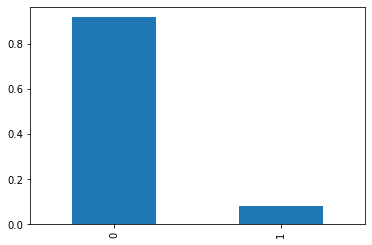

In [38]:
HVC_df['churned'].value_counts(normalize = True).plot(kind="bar")

### Observation

`This is a class imbalance problem as class 0 is disproportionately higher than class 1`

# Step 4:  Exploratory Data Analysis

In [39]:
#lets take look once again on null values of columns

null_perc1 = round(HVC_df.isnull().sum()*100/len(HVC_df),2)
pd.set_option('display.max_rows', None)
null_perc1

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

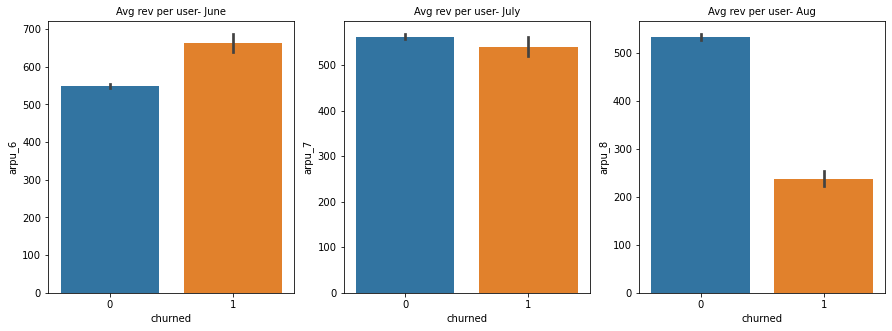

In [40]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
ax = sns.barplot( data= HVC_df, y= 'arpu_6' , x= 'churned' )
ax.set_title('Avg rev per user- June',fontsize= 10)

plt.subplot(1,3,2)
ax = sns.barplot( data= HVC_df, y= 'arpu_7' , x= 'churned' )
ax.set_title('Avg rev per user- July',fontsize= 10)

plt.subplot(1,3,3)
ax = sns.barplot( data= HVC_df, y= 'arpu_8' , x= 'churned' )
ax.set_title('Avg rev per user- Aug',fontsize= 10)

plt.show()

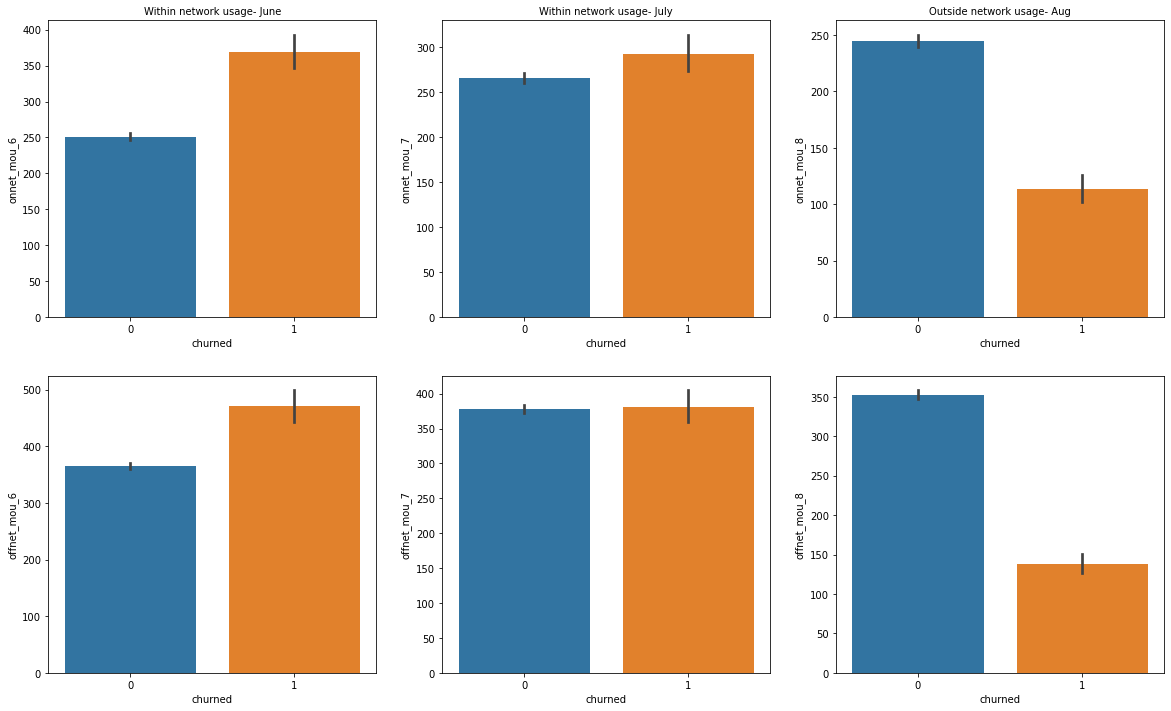

In [41]:
plt.figure(figsize=[20,12])

plt.subplot(2,3,1)
ax = sns.barplot( data= HVC_df, y= 'onnet_mou_6' , x= 'churned' )
ax.set_title('Within network usage- June',fontsize= 10)

plt.subplot(2,3,2)
ax = sns.barplot( data= HVC_df, y= 'onnet_mou_7' , x= 'churned' )
ax.set_title('Within network usage- July',fontsize= 10)

plt.subplot(2,3,3)
ax = sns.barplot( data= HVC_df, y= 'onnet_mou_8' , x= 'churned' )
ax.set_title('Within network usage- Aug',fontsize= 10)

plt.subplot(2,3,4)
sns.barplot( data= HVC_df, y= 'offnet_mou_6' , x= 'churned' )
ax.set_title('Outside network usage- June',fontsize= 10)

plt.subplot(2,3,5)
sns.barplot( data= HVC_df, y= 'offnet_mou_7' , x= 'churned' )
ax.set_title('Outside network usage- July',fontsize= 10)

plt.subplot(2,3,6)
sns.barplot( data= HVC_df, y= 'offnet_mou_8' , x= 'churned' )
ax.set_title('Outside network usage- Aug',fontsize= 10)

plt.show()

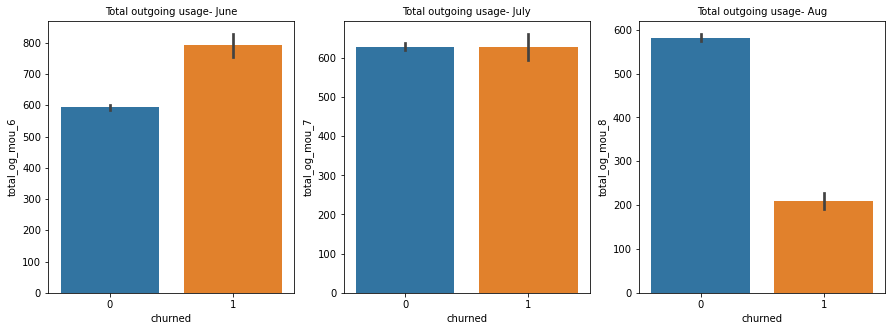

In [42]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
ax= sns.barplot( data= HVC_df, y= 'total_og_mou_6' , x= 'churned' )
ax.set_title('Total outgoing usage- June',fontsize= 10)

plt.subplot(1,3,2)
ax= sns.barplot( data= HVC_df, y= 'total_og_mou_7' , x= 'churned' )
ax.set_title('Total outgoing usage- July',fontsize= 10)

plt.subplot(1,3,3)
ax= sns.barplot( data= HVC_df, y= 'total_og_mou_8' , x= 'churned' )
ax.set_title('Total outgoing usage- Aug',fontsize= 10)

plt.show()

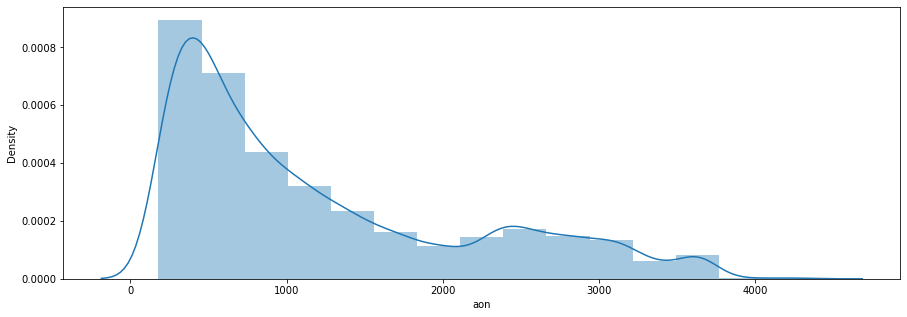

In [43]:
plt.figure(figsize=[15,5])
sns.distplot(HVC_df['aon'], bins= 15)
plt.show()

`We will create bins/groups for AON column as this is very import wrt to understand pattern for customer w.r.t their age on the network.`

In [44]:
#lets create column as years with network from AON

HVC_df['years_with_network'] = HVC_df['aon']/360

In [45]:
# create bins for years with network

def compute_years(x):
    if x<=1:
        return "Below 1yr"
    elif x<=2 and x>1:
        return "Bet 1-2yr"
    elif x<=3 and x>2:
        return "Bet 2-3yr"
    elif x<=4 and x>3:
        return "Bet 3-4yr"    
    else:
        return "Above 4yr"
    
HVC_df['years_with_network_bins'] = HVC_df.apply(lambda x: compute_years(x['years_with_network']),axis=1)

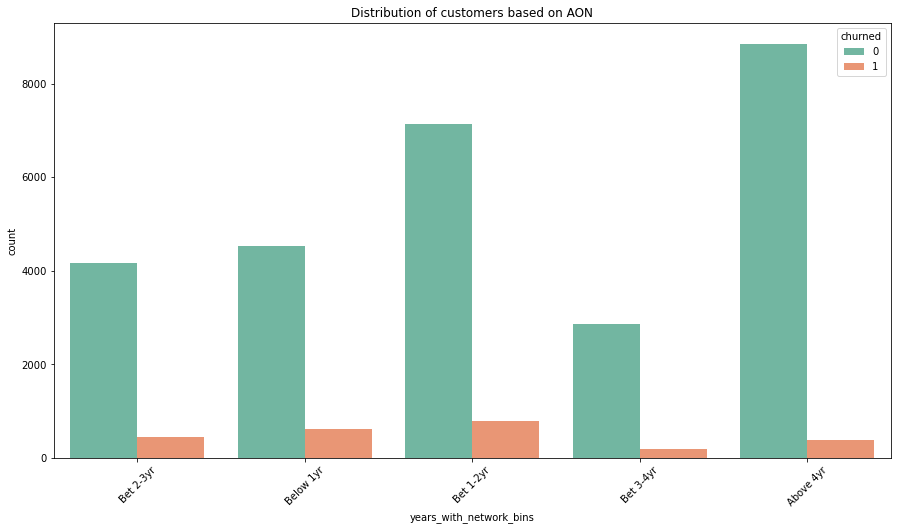

In [46]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = HVC_df, x= 'years_with_network_bins',hue= 'churned', palette="Set2")
plt.title('Distribution of customers based on AON')
plt.xticks(rotation=45)
plt.show()

In [47]:
HVC_df.groupby(by=["fb_user_6", "churned"])["churned"].size()

fb_user_6  churned
0.0        0          13073
           1           1403
1.0        0          14487
           1           1038
Name: churned, dtype: int64

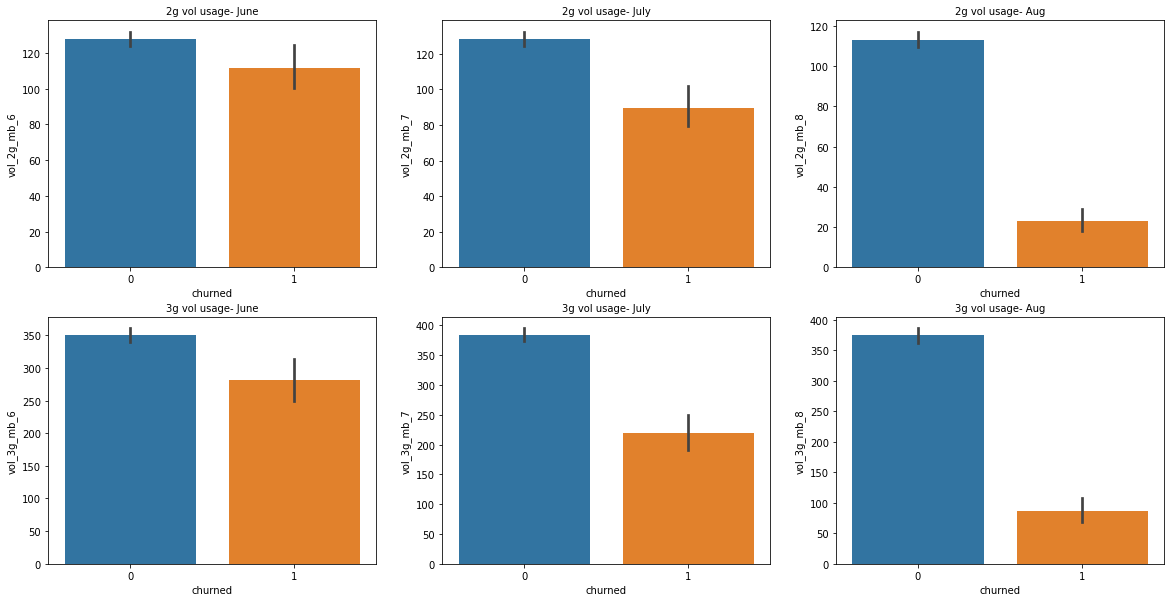

In [48]:
plt.figure(figsize=[20,10])

plt.subplot(2,3,1)
ax= sns.barplot( data= HVC_df, y= 'vol_2g_mb_6' , x= 'churned' )
ax.set_title('2g vol usage- June',fontsize= 10)

plt.subplot(2,3,2)
ax= sns.barplot( data= HVC_df, y= 'vol_2g_mb_7' , x= 'churned' )
ax.set_title('2g vol usage- July',fontsize= 10)

plt.subplot(2,3,3)
ax= sns.barplot( data= HVC_df, y= 'vol_2g_mb_8' , x= 'churned' )
ax.set_title('2g vol usage- Aug',fontsize= 10)

plt.subplot(2,3,4)
ax= sns.barplot( data= HVC_df, y= 'vol_3g_mb_6' , x= 'churned' )
ax.set_title('3g vol usage- June',fontsize= 10)

plt.subplot(2,3,5)
ax= sns.barplot( data= HVC_df, y= 'vol_3g_mb_7' , x= 'churned' )
ax.set_title('3g vol usage- July',fontsize= 10)

plt.subplot(2,3,6)
ax= sns.barplot( data= HVC_df, y= 'vol_3g_mb_8' , x= 'churned' )
ax.set_title('3g vol usage- Aug',fontsize= 10)

plt.show()

In [49]:
res = pd.pivot_table(data=HVC_df, index=["fb_user_6"], columns="years_with_network_bins", values= "churned")
res1 = pd.pivot_table(data=HVC_df, index=["fb_user_7"], columns="years_with_network_bins", values="churned")
res2 = pd.pivot_table(data=HVC_df, index=["fb_user_8"], columns="years_with_network_bins", values="churned")

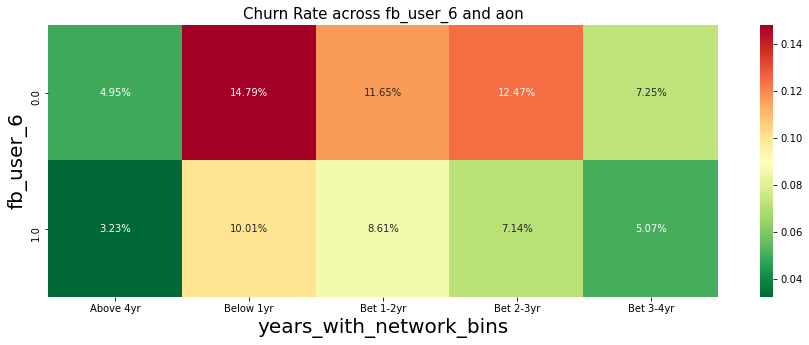

In [50]:
#fb_user_6 vs years_with_network_bins

plt.figure(figsize=(15,5))

g1 = sns.heatmap(res, cmap = "RdYlGn_r",annot = True, fmt=".2%")
g1.set_ylabel("fb_user_6", fontsize=20)
g1.set_xlabel("years_with_network_bins", fontsize=20)
plt.title("Churn Rate across fb_user_6 and aon", size=15)
plt.show()    

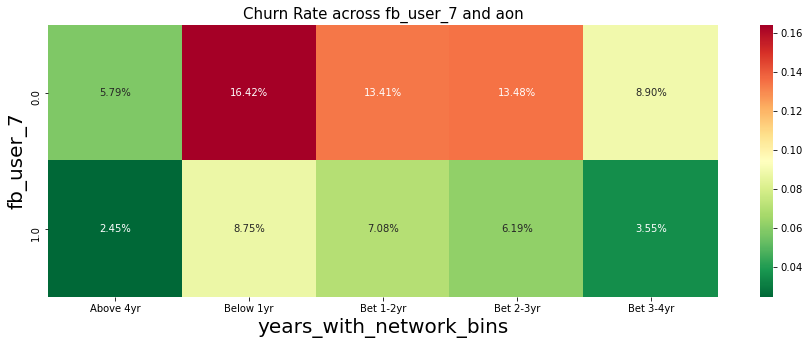

In [51]:
#fb_user_7 vs years_with_network_bins

plt.figure(figsize=(15,5))

g1 = sns.heatmap(res1, cmap = "RdYlGn_r",annot = True, fmt=".2%")
g1.set_ylabel("fb_user_7", fontsize=20)
g1.set_xlabel("years_with_network_bins", fontsize=20)
plt.title("Churn Rate across fb_user_7 and aon", size=15)
plt.show()    

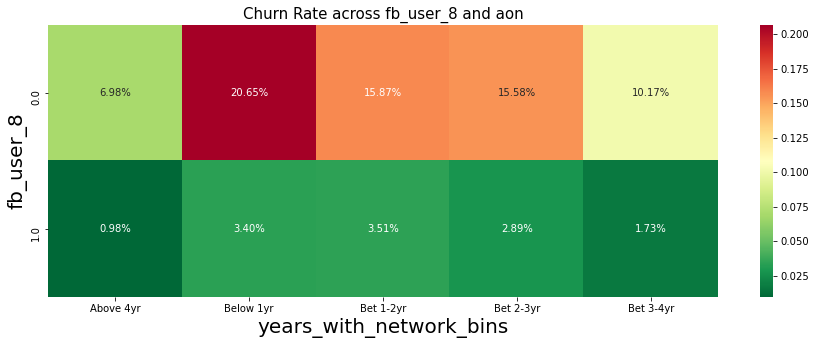

In [52]:
#fb_user_8 vs years_with_network_bins

plt.figure(figsize=(15,5))

g1 = sns.heatmap(res2, cmap = "RdYlGn_r",annot = True, fmt=".2%")
g1.set_ylabel("fb_user_8", fontsize=20)
g1.set_xlabel("years_with_network_bins", fontsize=20)
plt.title("Churn Rate across fb_user_8 and aon", size=15)
plt.show()    

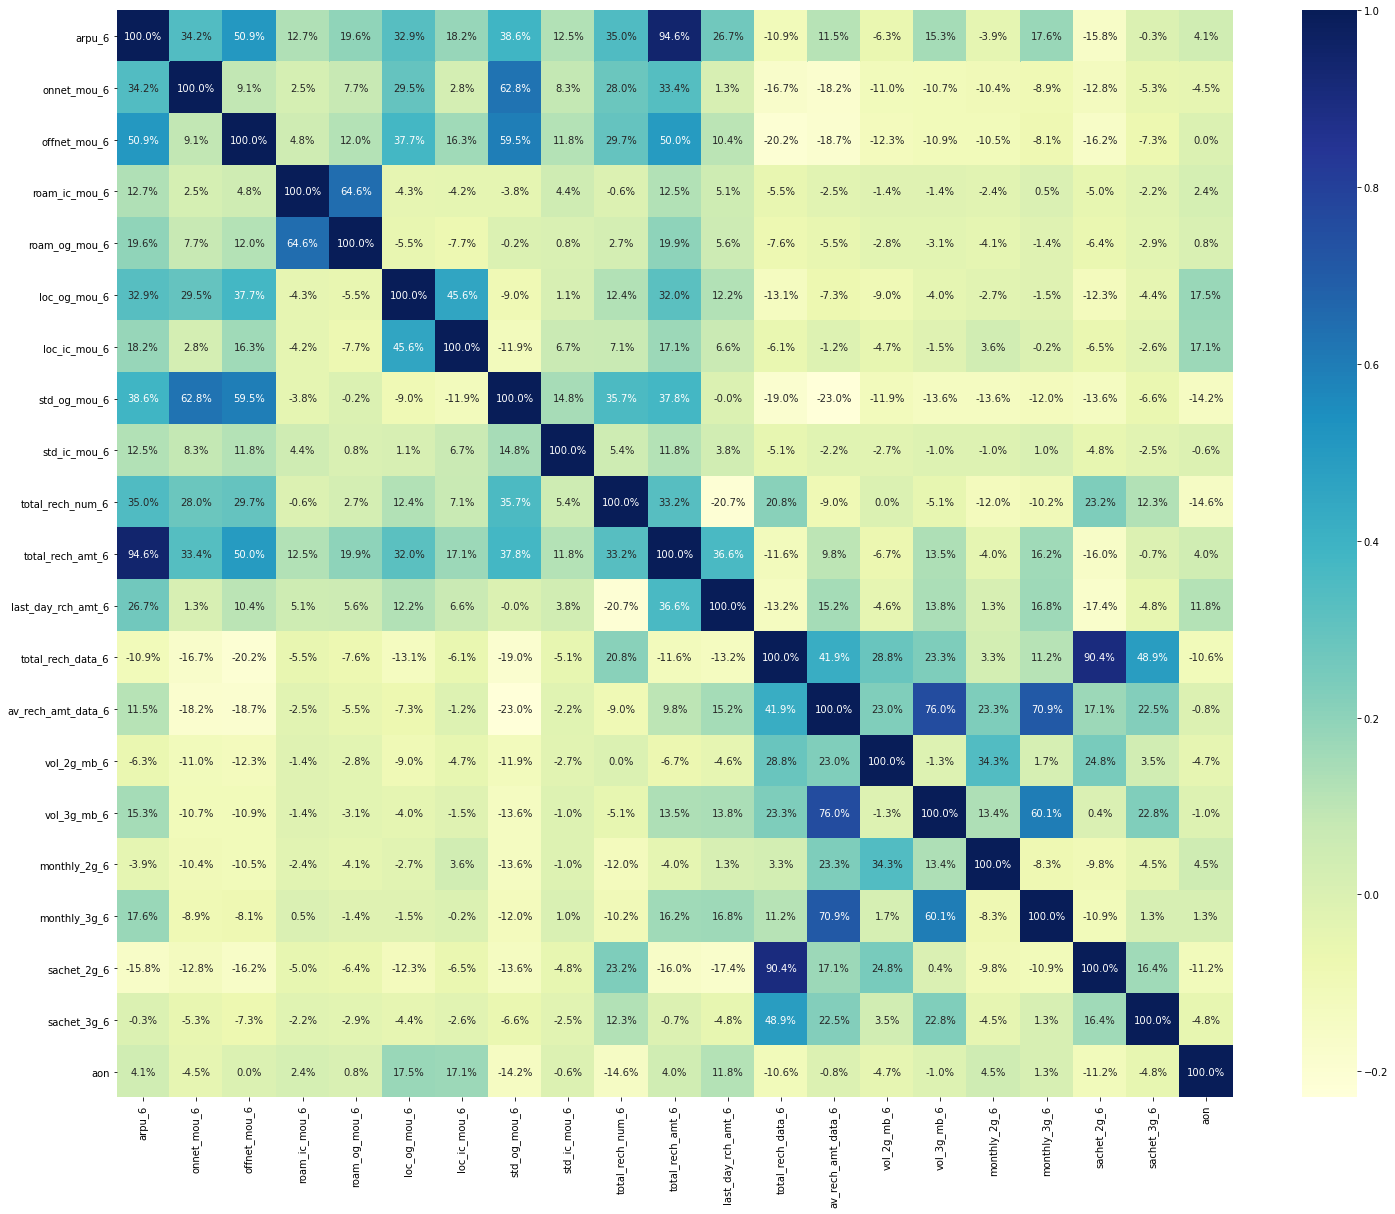

In [53]:
#creating list of numerical columns for heatmap check

HVC_month_6 = HVC_df[["arpu_6", 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'std_ic_mou_6', 'total_rech_num_6', 'total_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6','monthly_2g_6', 'monthly_3g_6','sachet_2g_6', 'sachet_3g_6', 'aon']]

#plotting heatmap
plt.figure(figsize=(25,20))
corr_map1 = sns.heatmap(HVC_month_6.corr(), cmap="YlGnBu", annot=True, fmt=".1%")

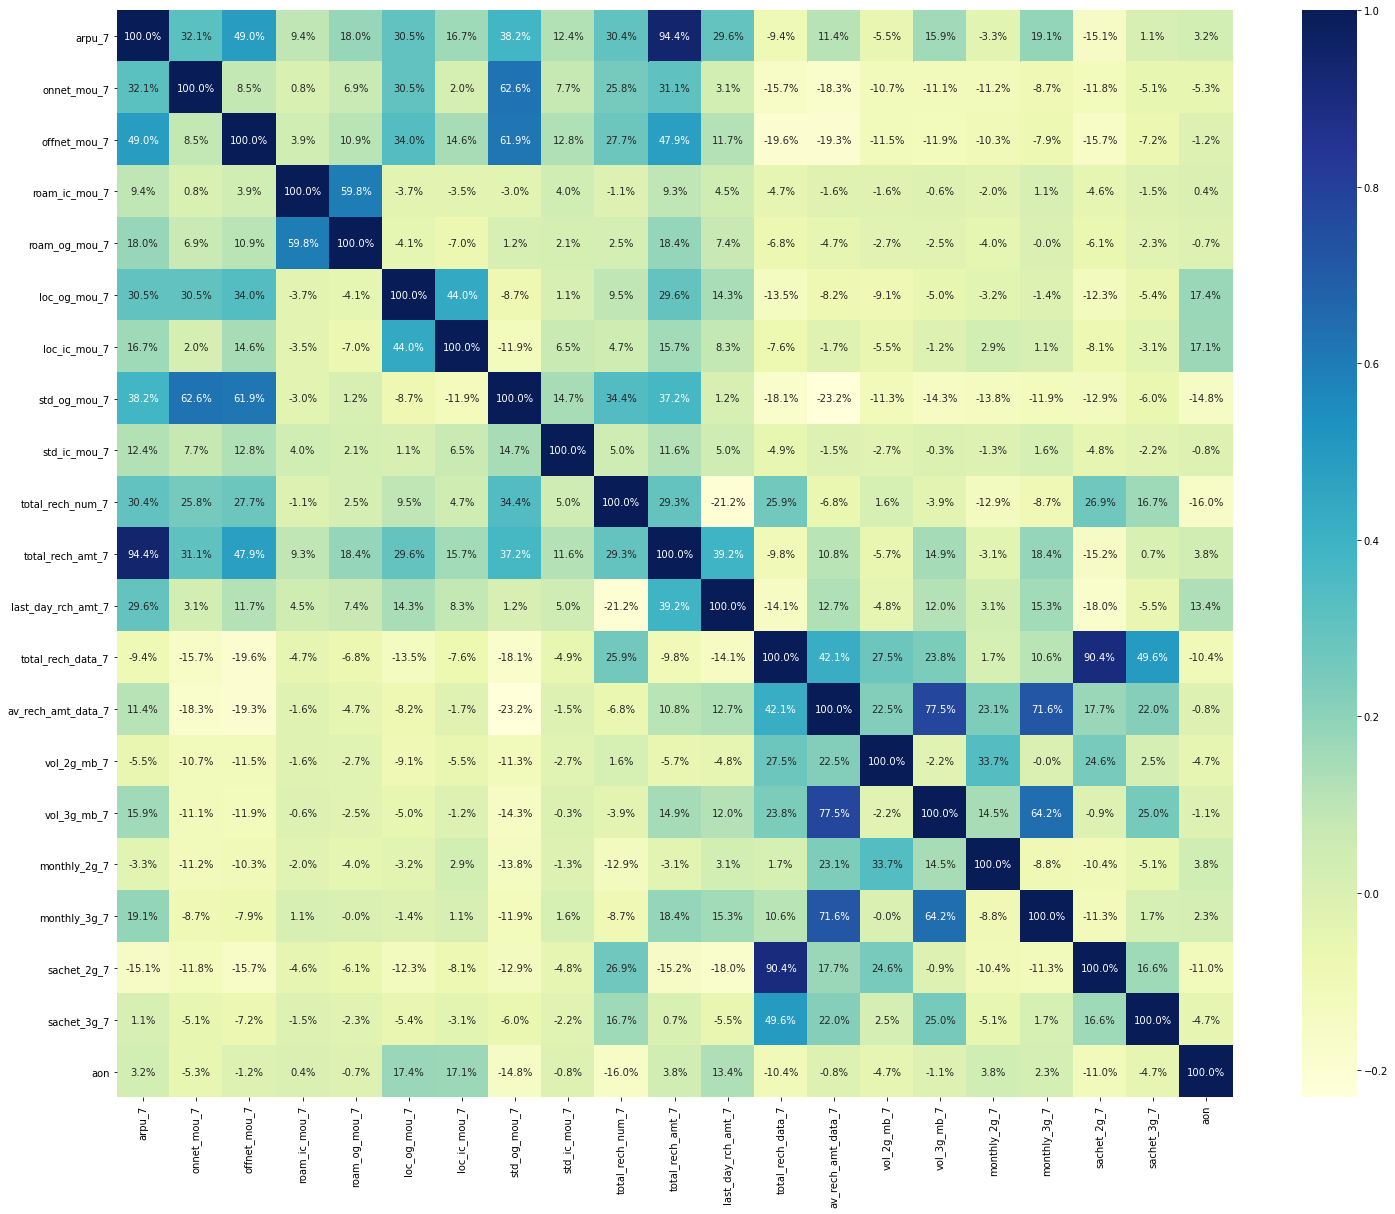

In [54]:
#creating list of numerical columns for heatmap check

HVC_month_7 = HVC_df[["arpu_7", 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_mou_7', 'loc_ic_mou_7', 'std_og_mou_7', 'std_ic_mou_7', 'total_rech_num_7', 'total_rech_amt_7', 'last_day_rch_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'monthly_3g_7','sachet_2g_7', 'sachet_3g_7', 'aon']]

#plotting heatmap
plt.figure(figsize=(25,20))
corr_map1 = sns.heatmap(HVC_month_7.corr(), cmap="YlGnBu", annot=True, fmt=".1%")

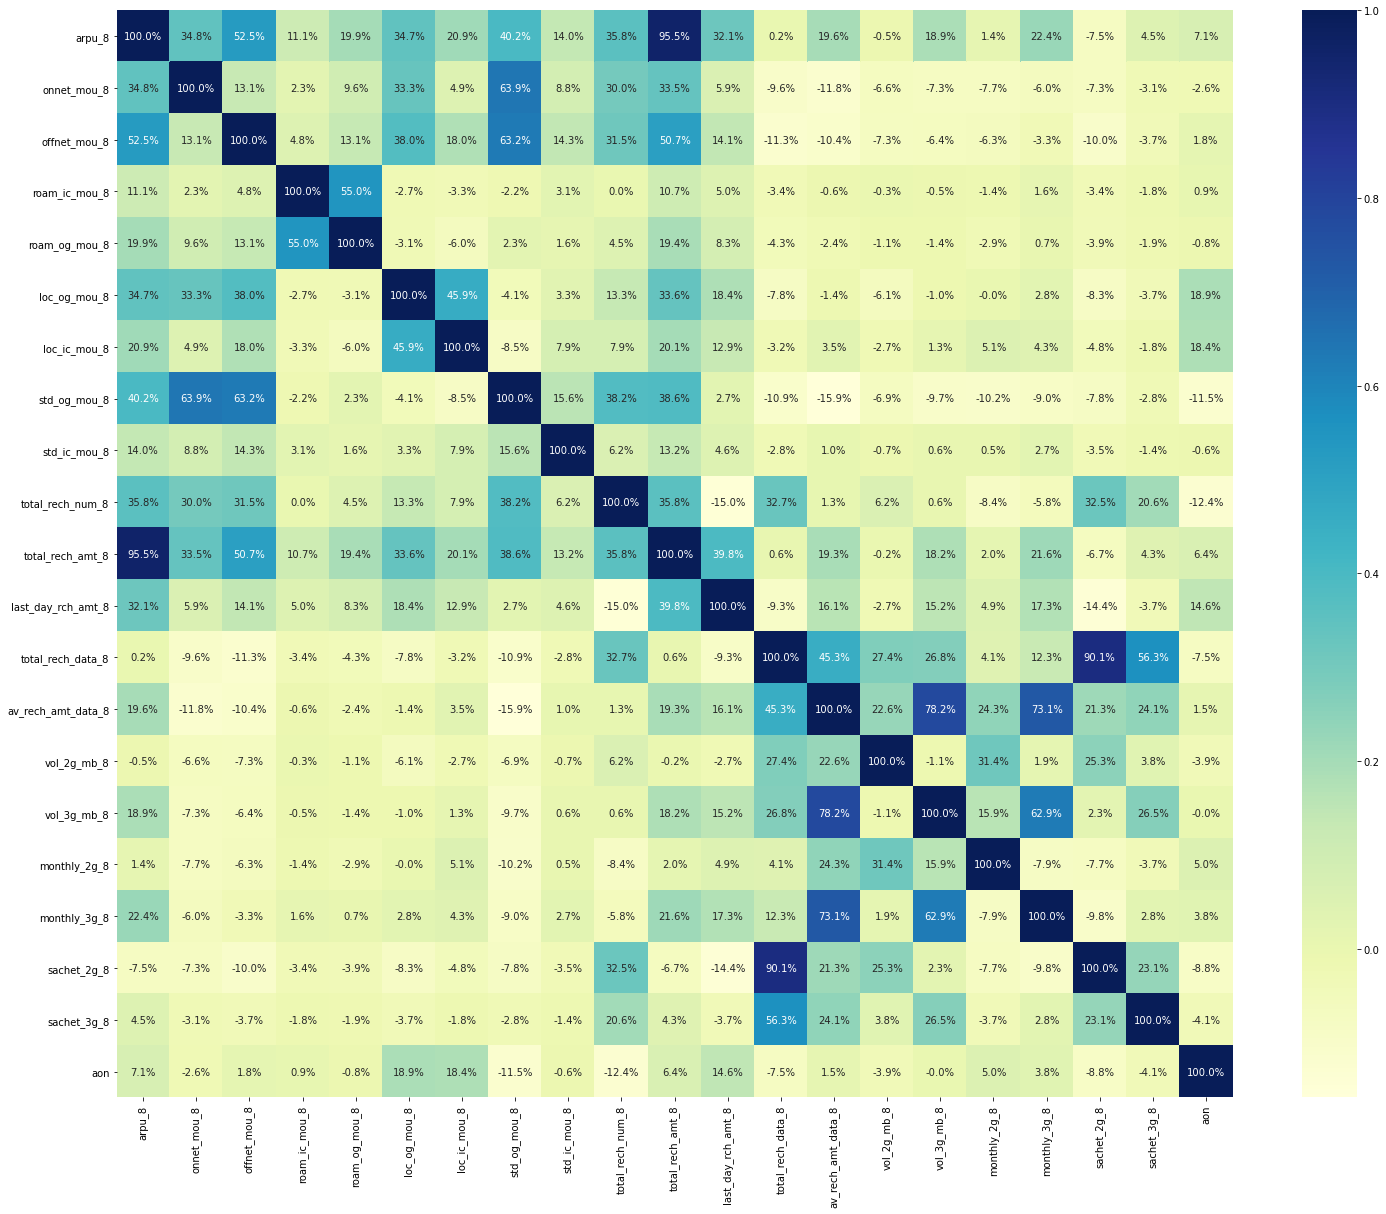

In [55]:
#creating list of numerical columns for heatmap check

HVC_month_8 = HVC_df[["arpu_8", 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'std_og_mou_8', 'std_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8','sachet_2g_8', 'sachet_3g_8', 'aon']]

#plotting heatmap
plt.figure(figsize=(25,20))
corr_map1 = sns.heatmap(HVC_month_8.corr(), cmap="YlGnBu", annot=True, fmt=".1%")

### Observation 

`For each month, we could see there is high correlation of columns (onnet, offnet, loc_og_mou, std_og_mou, total_rech_num, total_rech_amt) with arpu.`

# Step 5-  Derive New features

`Considering the business problem, we will check the diff of good phase and action phase.`

In [56]:
#lets take relook on our dataframe

HVC_df.shape

(30001, 142)

In [57]:
HVC_df['diff_arpu'] = HVC_df.arpu_8 - ((HVC_df.arpu_6 + HVC_df.arpu_7)/2)

HVC_df['diff_total_rech_num'] = HVC_df.total_rech_num_8 - ((HVC_df.total_rech_num_6 + HVC_df.total_rech_num_7)/2)

HVC_df['diff_total_rech_amt'] = HVC_df.total_rech_amt_8 - ((HVC_df.total_rech_amt_6 + HVC_df.total_rech_amt_7)/2)

HVC_df['diff_data_rech'] = HVC_df.total_data_rech_8 - ((HVC_df.total_data_rech_6 + HVC_df.total_data_rech_7)/2)

In [58]:
#lets take relook on our dataframe

HVC_df.shape

(30001, 146)

### Outlier Treatment

In [59]:
cols = HVC_df.columns

In [60]:
Ql = HVC_df[cols].quantile(0.01)
Qh = HVC_df[cols].quantile(0.999)
IQR = Qh - Ql

HVC_df = HVC_df[~((HVC_df[cols] < (Ql - 1.5 * IQR)) |(HVC_df[cols] > (Qh + 1.5 * IQR))).any(axis=1)]

In [61]:
HVC_df.shape

(29833, 146)

In [62]:
HVC_df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000   29833.000000   29833.000000   29833.000000   29833.000000   29833.000000   29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000  29833.000000  29833.000000  29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.000000  29833.00000  29833.000000  29833.000000    29833.000000    29833.000000     29833.00000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000      29833.000000   
mean     552.235798    554.063523    501.411485    259.803803    266.803970    232.439658    371.762521    376.097968    332.375741      15.794928      12.252453      11.942716      26.386309      19.926600      19.410332         83.874702         84.929591         76.958119        162.762888        162.799499        151.418100          6.226417          6.297335          5.808694          1.539056          1.775102          1.648618    252.872227    254.034781    234.192775        165.592055        174.088668        148.150657        178.953821        187.244014        155.947682          1.746343          1.760648          1.542258    346.295939    363.097044    305.643931      1.540533      1.474678      1.404580      5.662525      6.820447      6.364461      0.62795      0.010736      0.012490      607.008182      625.445628       547.62576         65.021587         66.184064         62.273214        150.159182        151.401106        145.993398         14.974623   
std      388.381468    393.971784    415.026655    456.406940    476.373969    446.883910    476.720808    492.327211    464.231585      71.636648      67.063189      62.867928     113.836875      93.958489      97.273121        223.994871        233.579088        207.109388        248.169624        240.837980        231.995122         19.663186         19.332921         18.236501          5.774115          6.615438          6.180301    371.507027    369.923644    348.780490        402.837746        421.338822        397.031537        406.489207        429.557453        391.961794         11.098567         12.036093         10.284072    605.300153    636.123276    596.477301     16.448498     16.167976     17.179454     15.310762     17.094162     17.970592      1.95606      0.271038      0.294173      682.407515      708.941032       680.09327        159.122364        164.040739        157.008129        218.661299        217.918551        214.390306         42.017996   
min     -810.661000  -1289.715000   -345.129000      0.000000      0.

In [63]:
# Dropping the only categorical column called 'aon_bins'

HVC_df.drop(['years_with_network_bins', 'years_with_network'], axis = 1, inplace=True)
HVC_df.shape

(29833, 144)

In [64]:
HVC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29833 entries, 0 to 30000
Columns: 144 entries, arpu_6 to diff_data_rech
dtypes: float64(118), int64(26)
memory usage: 33.0 MB


## Dummy Variables

`There was no need of creating dummy variables as such since the there are only 2 levels in all available categorical columns. Dummy variables could be created only when we have more than 2 levels in category.`

# Step 6: Train Test Split

In [65]:
### Splitting the dataset into train and test
df_train, df_test = train_test_split(HVC_df, test_size=0.3, random_state=42, stratify=HVC_df.churned)

In [66]:
## Checking the shape of train and test set
df_train.shape, df_test.shape

((20883, 144), (8950, 144))

In [67]:
# The stratification during the train_test_split has distributed majority and minority class
#for train set into this proportion

df_train.churned.value_counts(normalize=True)

0    0.918738
1    0.081262
Name: churned, dtype: float64

In [68]:
# The stratification during the train_test_split has distributed majority and minority class
#for test set into this proportion

df_test.churned.value_counts(normalize=True)

0    0.918659
1    0.081341
Name: churned, dtype: float64

In [69]:
## We will again bifurcate the train and test set
## Bifurcation will divide the train and test set in target variable of Y and the set of predictor variables as X.

X_train = df_train.drop('churned', axis=1)
y_train = df_train['churned']
X_test = df_test.drop('churned', axis=1)
y_test = df_test['churned']

# Step 7:  Feature Scaling

#### Preparing columns for the purpose of scaling

In [70]:
### We will exclude the following binary columns having values of 0/1 as such columns are already scaled

cols_exclude = ['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

In [71]:
### Creating a separate dataframe having all the columns except the binary columns mentioned above

df2 = HVC_df[HVC_df.columns.difference(cols_exclude)]

In [72]:
## Let's drop the target variable of churned from the set of columns and create our final group of columns for scaling

X = df2.drop('churned', axis=1)

In [73]:
#Lets define list of columns which are considered for feature scaling 

cols_to_scale = list(X)

#### Performing the scaling operation

In [74]:
# Apply scaler() to all the columns except the '0/1 and target variable of churned

scaler = StandardScaler()

In [75]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [76]:
X_train.describe(include = 'all')

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04   2.088300e+04   2.088300e+04   2.088300e+04   2.088300e+04   2.088300e+04   2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04  2.088300e+04    2.088300e+04    2.088300e+04    2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04      2.088300e+04   
mean  -3.380364e-16  2.568245e-16 -8.504107e-17  4.875135e-17 -3.365810e-17  1.581043e-16 -1.146002e-16 -8.231908e-17 -7.546093e-17   8.338581e-16   1.307849e-15  -2.274328e-15   3.329925e-16  -4.997333e-16  -1.404483e-15     -5.090981e-17      8.134086e-17     -7.970341e-17      4.540202e-17      6.448257e-17      1.867384e-17      5.256401e-16     -1.271613e-15     -6.758283e-16     -1.214355e-15     -1.119686e-16      3.131570e-16  2.511466e-17  5.760847e-17 -1.138772e-16     -2.463485e-16     -2.350990e-16      4.444986e-16     -5.632642e-16      2.880982e-16      1.942797e-16     -1.128334e-15      1.133535e-16      3.434953e-15 -6.017097e-16  2.148462e-16 -3.418443e-16  3.919912e-17 -1.940776e-15 -9.424309e-16  1.697435e-15  5.301670e-16  6.391106e-16 -3.732854e-16  4.488228e-16  1.272870e-15    1.088532e-16    7.511802e-17   -7.538831e-17      1.576949e-16      2.225178e-17      1.968927e-17     -5.241435e-17      3.894260e-17      7.460898e-18     -3.572618e-16   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   1.000024e+00   1.000024e+00   1.000024e+00   1.000024e+00   1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00    1.000024e+00    1.000024e+00    1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00      1.000024e+00   
min   -3.520462e+00 -4.712155e+00 -2.056543e+00 -5.709983e-01 -5.

In [77]:
HVC_df.shape

(29833, 144)

In [78]:
X_train.shape

(20883, 143)

# Step 8: Handling Class Imbalance

In [79]:
# Let's see again how the majority and minority classes add up

print("counts of label '1':",sum(y_train==1)) 
print("counts of label '0':",sum(y_train==0))
print()

print("The proportion of majority and minority are as follows:")
y_train.value_counts(normalize=True)

counts of label '1': 1697
counts of label '0': 19186

The proportion of majority and minority are as follows:


0    0.918738
1    0.081262
Name: churned, dtype: float64

### Class Imbalance Handling Technique used: SMOTE

In [80]:
## Class Imbalance Libraries
from collections import Counter

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_resampled_smt1, y_resampled_smt1 = smt.fit_resample(X_train, y_train)

X_train1 = X_resampled_smt1
y_train1 = y_resampled_smt1

# Lets see how the classes look after imbalance treatment
print("counts of label '1':",sum(y_train1==1))
print("counts of label '0':",sum(y_train1==0))

counts of label '1': 19186
counts of label '0': 19186


In [81]:
print(sorted(Counter(y_train1).items()))

[(0, 19186), (1, 19186)]


# Step 9: Model Building: Logistic Regression

In [82]:
# Importing the required libraries
import statsmodels.api as sm

### 9.1 Model 1

In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train1,(sm.add_constant(X_train1)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38235
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13397.
Date:                Mon, 05 Jul 2021   Deviance:                       26795.
Time:                        17:03:28   Pearson chi2:                 2.10e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5952      0.053    -29.937      0.000      -1.700      -1.491
arpu_6                  0.3157      0.055      5.741      0.000       0.208       0.423
arpu_7                  0.3048      0.065      4.715      0.000       0.178       0.431
arpu_8                  0.4751      0.049      9.758      0.000       0.380       0.570
onnet_mou_6            -1.7460      1.668     -1.047      0.295      -5.015       1.523
onnet_mou_7            -9.1295      1.537     -5.939      0.000     -12.143      -6.116
onnet_mou_8             8.9352      1.728      5.170      0.000       5.548      12.322
offnet_mou_6           -1.7562      1.741     -1.009      0.313      -5.168       1.656
offnet_mou_7           -8.6640      1.514     -5.724      0.000     -11.631      -5.697
offnet_mou_8            7.3029      1.704      4.286      0.000       3.963      10.643
roam_ic_mou_6           0.0237      0.026      0.903      0.366      -0.028       0.075
roam_ic_mou_7           0.0778      0.025      3.073      0.002       0.028       0.127
roam_ic_mou_8          -0.1368      0.024     -5.809      0.000      -0.183      -0.091
roam_og_mou_6           0.3930      0.418      0.940      0.347      -0.426       1.212
roam_og_mou_7           1.8335      0.297      6.171      0.000       1.251       2.416
roam_og_mou_8          -1.6461      0.361     -4.558      0.000      -2.354      -0.938
loc_og_t2t_mou_6      589.2353    733.383      0.803      0.422    -848.169    2026.639
loc_og_t2t_mou_7     -277.2630    767.994     -0.361      0.718   -1782.504    1227.978
loc_og_t2t_mou_8     9293.5313    722.201     12.868      0.000    7878.043    1.07e+04
loc_og_t2m_mou_6      639.0449    795.579      0.803      0.422    -920.260    2198.350
loc_og_t2m_mou_7     -274.4366    759.048     -0.362      0.718   -1762.144    1213.271
loc_og_t2m_mou_8     9986.5681    775.992     12.869      0.000    8465.652    1.15e+04
loc_og_t2f_mou_6       49.3829     61.445      0.804      0.422     -71.047     169.812
loc_og_t2f_mou_7      -22.1831     61.017     -0.364      0.716    -141.773      97.407
loc_og_t2f_mou_8      748.2443     58.139     12.870      0.000     634.294     862.194
loc_og_t2c_mou_6       -0.1601      0.026     -6.096      0.000      -0.212      -0.109
loc_og_t2c_mou_7       -0.0632      0.027     -2.329      0.020      -0.116      -0.010
loc_og_t2c_mou_8        0.0747      0.026      2.896      0.004       0.024       0.125
loc_og_mou_6        -2872.8812   1515.030     -1.896      0.058   -5842.285      96.522
loc_og_mou_7        -2656.6344   1575.487     -1.686      0.092   -5744.532     431.263
loc_og_mou_8        -4544.7428   1591.187     -2.856      0.004   -7663.413   -1426.073
std_og_t2t_mou_6      135.8529   1601.267      0.085      0.932   -3002.574    3274.279
std

In [84]:
# Importing RFE and LinearRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train1, y_train1)

In [86]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [87]:
list(zip(X_train1.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 23),
 ('arpu_7', True, 1),
 ('arpu_8', False, 19),
 ('onnet_mou_6', False, 41),
 ('onnet_mou_7', False, 77),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 106),
 ('offnet_mou_7', False, 12),
 ('offnet_mou_8', False, 14),
 ('roam_ic_mou_6', False, 96),
 ('roam_ic_mou_7', False, 40),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_6', False, 97),
 ('roam_og_mou_7', False, 17),
 ('roam_og_mou_8', False, 38),
 ('loc_og_t2t_mou_6', False, 43),
 ('loc_og_t2t_mou_7', False, 82),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_6', False, 60),
 ('loc_og_t2m_mou_7', False, 103),
 ('loc_og_t2m_mou_8', False, 118),
 ('loc_og_t2f_mou_6', False, 114),
 ('loc_og_t2f_mou_7', False, 58),
 ('loc_og_t2f_mou_8', False, 121),
 ('loc_og_t2c_mou_6', False, 22),
 ('loc_og_t2c_mou_7', False, 83),
 ('loc_og_t2c_mou_8', False, 67),
 ('loc_og_mou_6', False, 122),
 ('loc_og_mou_7', False, 15),
 ('loc_og_mou_8', False, 55),
 ('std_og_t2t_mou_6', False, 42),
 ('std_og_t2t_mou_7', False, 99

In [88]:
col = X_train1.columns[rfe.support_]

In [89]:
X_train1.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_6', 'total_data_rech_7', 'total_data_rech_8', 'diff_arpu', 'diff_total_rech_num', 'diff_total_rech_amt', 'diff_data_rech'], dtype='object', length=128)

### Model 2

In [90]:
X_train_sm = sm.add_constant(X_train1[col])
logm2 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14853.
Date:                Mon, 05 Jul 2021   Deviance:                       29707.
Time:                        17:05:23   Pearson chi2:                 4.96e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1126      0.031    -36.445      0.000      -1.172      -1.053
arpu_7                 0.4976      0.020     25.106      0.000       0.459       0.536
onnet_mou_8            1.2848      0.074     17.336      0.000       1.140       1.430
std_og_t2m_mou_8       1.0091      0.066     15.277      0.000       0.880       1.139
total_og_mou_8        -2.3011      0.110    -20.900      0.000      -2.517      -2.085
loc_ic_t2t_mou_7       0.5926      0.126      4.694      0.000       0.345       0.840
loc_ic_t2m_mou_7       0.8251      0.163      5.054      0.000       0.505       1.145
loc_ic_mou_7          -0.6481      0.225     -2.882      0.004      -1.089      -0.207
loc_ic_mou_8          -0.8653      0.119     -7.294      0.000      -1.098      -0.633
total_ic_mou_6         0.4145      0.033     12.573      0.000       0.350       0.479
total_ic_mou_8        -1.6174      0.102    -15.905      0.000      -1.817      -1.418
spl_ic_mou_8          -0.7909      0.046    -17.148      0.000      -0.881      -0.701
total_rech_num_8      -0.6711      0.026    -25.649      0.000      -0.722      -0.620
last_day_rch_amt_8    -0.4198      0.020    -21.065      0.000      -0.459      -0.381
fb_user_8             -1.7347      0.035    -49.090      0.000      -1.804      -1.665
aon                   -0.3560      0.019    -19.204      0.000      -0.392      -0.320
======================================================================================
"""

### Checking Multicollinearity: High VIF

#### General Rule of Thumb as prescribed by industry standards:
1. VIF≥ 5: Highly Correlated and variable should be treated
2. 1>VIF>5: Medium Correlated, but acceptable
3. VIF = 1 : Not Correlated

In [91]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train1[col].values,i) for i in range(X_train1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

Features    VIF
6         loc_ic_mou_7  69.53
5     loc_ic_t2m_mou_7  36.29
4     loc_ic_t2t_mou_7  17.70
3       total_og_mou_8  15.84
7         loc_ic_mou_8  11.44
9       total_ic_mou_8   9.20
1          onnet_mou_8   7.41
2     std_og_t2m_mou_8   5.33
8       total_ic_mou_6   2.32
11    total_rech_num_8   1.55
0               arpu_7   1.39
12  last_day_rch_amt_8   1.23
14                 aon   1.17
10        spl_ic_mou_8   1.06
13           fb_user_8   1.05

In [93]:
# Let's drop loc_ic_mou_7 since it has slightly high p-value of 0.06 and hence it is statistically insignificant
col = col.drop('loc_ic_mou_7',1)
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon'], dtype='object')

### Model 3

In [94]:
X_train_sm = sm.add_constant(X_train1[col])
logm3 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14858.
Date:                Mon, 05 Jul 2021   Deviance:                       29716.
Time:                        17:05:25   Pearson chi2:                 4.91e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1109      0.031    -36.412      0.000      -1.171      -1.051
arpu_7                 0.4955      0.020     25.043      0.000       0.457       0.534
onnet_mou_8            1.2788      0.074     17.271      0.000       1.134       1.424
std_og_t2m_mou_8       1.0047      0.066     15.222      0.000       0.875       1.134
total_og_mou_8        -2.2900      0.110    -20.821      0.000      -2.506      -2.074
loc_ic_t2t_mou_7       0.2509      0.042      5.992      0.000       0.169       0.333
loc_ic_t2m_mou_7       0.3731      0.043      8.613      0.000       0.288       0.458
loc_ic_mou_8          -0.9016      0.118     -7.639      0.000      -1.133      -0.670
total_ic_mou_6         0.4050      0.033     12.367      0.000       0.341       0.469
total_ic_mou_8        -1.6146      0.102    -15.883      0.000      -1.814      -1.415
spl_ic_mou_8          -0.7898      0.046    -17.136      0.000      -0.880      -0.699
total_rech_num_8      -0.6672      0.026    -25.556      0.000      -0.718      -0.616
last_day_rch_amt_8    -0.4194      0.020    -21.071      0.000      -0.458      -0.380
fb_user_8             -1.7375      0.035    -49.203      0.000      -1.807      -1.668
aon                   -0.3602      0.018    -19.487      0.000      -0.396      -0.324
======================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train1[col].values,i) for i in range(X_train1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

Features    VIF
3       total_og_mou_8  15.84
6         loc_ic_mou_8  11.28
8       total_ic_mou_8   9.19
1          onnet_mou_8   7.41
2     std_og_t2m_mou_8   5.33
5     loc_ic_t2m_mou_7   2.75
7       total_ic_mou_6   2.28
4     loc_ic_t2t_mou_7   1.90
10    total_rech_num_8   1.55
0               arpu_7   1.39
11  last_day_rch_amt_8   1.23
13                 aon   1.16
9         spl_ic_mou_8   1.06
12           fb_user_8   1.05

In [96]:
# Let's drop total_og_mou_8 since it has slightly high p-value of 0.06 and hence it is statistically insignificant
col = col.drop('total_og_mou_8',1)
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon'], dtype='object')

### Model 4

In [97]:
X_train_sm = sm.add_constant(X_train1[col])
logm4 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15126.
Date:                Mon, 05 Jul 2021   Deviance:                       30251.
Time:                        17:05:26   Pearson chi2:                 5.45e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1596      0.031    -37.681      0.000      -1.220      -1.099
arpu_7                 0.4583      0.019     23.840      0.000       0.421       0.496
onnet_mou_8           -0.1940      0.020     -9.734      0.000      -0.233      -0.155
std_og_t2m_mou_8      -0.2838      0.022    -12.675      0.000      -0.328      -0.240
loc_ic_t2t_mou_7       0.3904      0.042      9.401      0.000       0.309       0.472
loc_ic_t2m_mou_7       0.3216      0.042      7.608      0.000       0.239       0.405
loc_ic_mou_8          -1.5925      0.117    -13.662      0.000      -1.821      -1.364
total_ic_mou_6         0.4418      0.033     13.417      0.000       0.377       0.506
total_ic_mou_8        -1.7032      0.103    -16.570      0.000      -1.905      -1.502
spl_ic_mou_8          -0.7956      0.046    -17.334      0.000      -0.886      -0.706
total_rech_num_8      -0.6942      0.026    -26.946      0.000      -0.745      -0.644
last_day_rch_amt_8    -0.4441      0.020    -22.605      0.000      -0.483      -0.406
fb_user_8             -1.6709      0.035    -48.008      0.000      -1.739      -1.603
aon                   -0.3703      0.018    -20.314      0.000      -0.406      -0.335
======================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train1[col].values,i) for i in range(X_train1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

Features    VIF
5         loc_ic_mou_8  10.91
7       total_ic_mou_8   9.19
4     loc_ic_t2m_mou_7   2.73
6       total_ic_mou_6   2.28
3     loc_ic_t2t_mou_7   1.86
9     total_rech_num_8   1.51
0               arpu_7   1.37
1          onnet_mou_8   1.34
2     std_og_t2m_mou_8   1.28
10  last_day_rch_amt_8   1.21
12                 aon   1.15
8         spl_ic_mou_8   1.06
11           fb_user_8   1.04

In [99]:
# Let's drop loc_ic_mou_8 since it has slightly high p-value of 0.06 and hence it is statistically insignificant
col = col.drop('loc_ic_mou_8',1)
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8', 'aon'], dtype='object')

### Model 5

In [100]:
X_train_sm = sm.add_constant(X_train1[col])
logm5 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15212.
Date:                Mon, 05 Jul 2021   Deviance:                       30424.
Time:                        17:05:27   Pearson chi2:                 4.87e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1146      0.030    -37.085      0.000      -1.173      -1.056
arpu_7                 0.4894      0.019     25.585      0.000       0.452       0.527
onnet_mou_8           -0.1904      0.020     -9.601      0.000      -0.229      -0.152
std_og_t2m_mou_8      -0.2632      0.022    -11.931      0.000      -0.306      -0.220
loc_ic_t2t_mou_7       0.2267      0.041      5.533      0.000       0.146       0.307
loc_ic_t2m_mou_7       0.1204      0.037      3.211      0.001       0.047       0.194
total_ic_mou_6         0.5481      0.032     16.877      0.000       0.484       0.612
total_ic_mou_8        -2.9685      0.061    -48.932      0.000      -3.087      -2.850
spl_ic_mou_8          -0.7910      0.046    -17.224      0.000      -0.881      -0.701
total_rech_num_8      -0.7127      0.026    -27.676      0.000      -0.763      -0.662
last_day_rch_amt_8    -0.4539      0.020    -22.971      0.000      -0.493      -0.415
fb_user_8             -1.6772      0.035    -48.311      0.000      -1.745      -1.609
aon                   -0.3913      0.018    -21.657      0.000      -0.427      -0.356
======================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train1[col].columns  
vif['VIF']=[variance_inflation_factor(X_train1[col].values,i) for i in range(X_train1[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)

vif

Features   VIF
6       total_ic_mou_8  2.67
4     loc_ic_t2m_mou_7  2.24
5       total_ic_mou_6  2.16
3     loc_ic_t2t_mou_7  1.56
8     total_rech_num_8  1.50
0               arpu_7  1.35
1          onnet_mou_8  1.34
2     std_og_t2m_mou_8  1.27
9   last_day_rch_amt_8  1.20
11                 aon  1.14
7         spl_ic_mou_8  1.06
10           fb_user_8  1.04

`Here we are good with features and their VIF within specifications.`

### 9.2 Prediction stages: Train & Test

In [102]:
#Predict on training set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.063469
1    0.138253
2    0.915543
3    0.082322
4    0.735279
5    0.296673
6    0.110470
7    0.369114
8    0.234251
9    0.347033
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06346865, 0.13825259, 0.91554306, 0.08232245, 0.73527874,
       0.29667277, 0.11046951, 0.36911433, 0.23425146, 0.3470332 ])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [104]:
y_train_pred_final = pd.DataFrame({'Churned':y_train1.values, 'Churned_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churned_Prob
0        0      0.063469
1        0      0.138253
2        1      0.915543
3        0      0.082322
4        1      0.735279

#### Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0 

In [105]:
y_train_pred_final['predicted'] = y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churned  Churned_Prob  predicted
0        0      0.063469          0
1        0      0.138253          0
2        1      0.915543          1
3        0      0.082322          0
4        1      0.735279          1

In [106]:
### Importing the evaluation metrics
from sklearn import metrics

In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[15800  3386]
 [ 3066 16120]]


In [108]:
# Let's check the overall accuracy.

print("Accuracy Score with churned prob of 0.5 is: ", round(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted),3))
print("Precision Score with churned prob of 0.5 is: ", round(metrics.precision_score(y_train_pred_final.Churned, y_train_pred_final.predicted),3))
print("Recall Score with churned prob of 0.5 is: ", round(metrics.recall_score(y_train_pred_final.Churned, y_train_pred_final.predicted),3))

Accuracy Score with churned prob of 0.5 is:  0.832
Precision Score with churned prob of 0.5 is:  0.826
Recall Score with churned prob of 0.5 is:  0.84


In [109]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06346865, 0.13825259, 0.91554306, 0.08232245, 0.73527874,
       0.29667277, 0.11046951, 0.36911433, 0.23425146, 0.3470332 ])

### Evaluation metrics and their importance

1. Accuracy: It refers to the sum of correct assessments by the sum of all assessments
2. Sensitivity or Recall Score : It refers to the proportion of positives that are correctly identified. This means the proportion of those leads which are identified correctly as converted were actually converted.
3. Specificity : It refers to the proportion of negatives that are correctly identified. This means the proportion of those leads which are identified correctly as non-converted were actually non-converted.
4. False Positive Rate: It refers to predicting the rate that something has happened, even though in reality, it never happened. This means the rate of predicting that customer has converted when in reality the customer did not actually convert.
5. Positive Predictive Value or Precision Score: the number of positives correctly predicted by the total number of positives predicted.     
6. Negative Predictive Value : the number of negatives correctly predicted by the total number of negatives predicted. 

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Calculating all the evaluation metrics at churned probability of 0.5


In [111]:
sn1 = TP / float(TP+FN) # Sensitivity
sp1 = TN / float(TN+FP) # Specificity
fpr1 = FP/ float(TN+FP) # False Positive Rate
ppv1 = TP / float(TP+FP) # Positive Predictive Value
npvf =  TN / float(TN+ FN) # Negative Predictive Value

print("Sensitivity = ", sn1)
print("Specificity =", sp1)
print("False Positive Rate =", fpr1)
print ("Positive Predictive Value = ", ppv1 )
print("Negative predictive Value = ", npvf)

Sensitivity =  0.8401959762326696
Specificity = 0.8235171479203586
False Positive Rate = 0.1764828520796414
Positive Predictive Value =  0.8264123859325336
Negative predictive Value =  0.8374854235131983


### 9.3 Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churned_Prob, drop_intermediate = False )

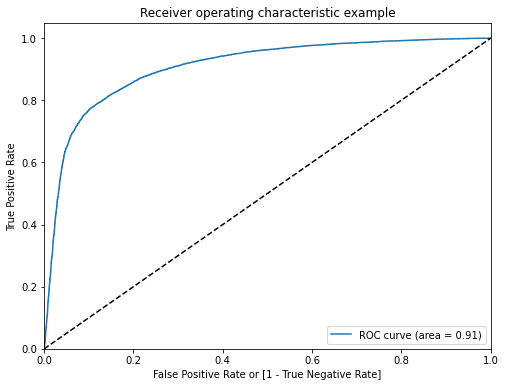

In [114]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

### Finding Optimal Cutoff Point

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churned  Churned_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0        0      0.063469          0    1    0    0    0    0    0    0    0    0    0
1        0      0.138253          0    1    1    0    0    0    0    0    0    0    0
2        1      0.915543          1    1    1    1    1    1    1    1    1    1    1
3        0      0.082322          0    1    0    0    0    0    0    0    0    0    0
4        1      0.735279          1    1    1    1    1    1    1    1    1    0    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.691885  0.975816  0.407954
0.2   0.2  0.756124  0.951840  0.560409
0.3   0.3  0.796440  0.921974  0.670906
0.4   0.4  0.821823  0.885437  0.758209
0.5   0.5  0.831857  0.840196  0.823517
0.6   0.6  0.834827  0.792766  0.876889
0.7   0.7  0.828234  0.739289  0.917179
0.8   0.8  0.799698  0.650162  0.949234
0.9   0.9  0.627150  0.269832  0.984468


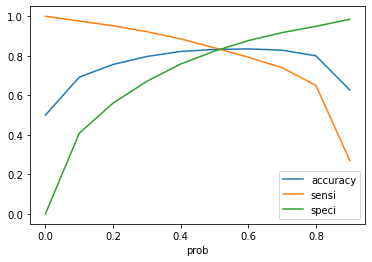

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Observation:
`It can be seen from the graph that the cut off value will be close to 0.57`

##### Creating new column 'final_predicted' with 1 if Lead_Prob > 0.57 else 0


In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_pred_final.head()

Churned  Churned_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0        0      0.063469          0    1    0    0    0    0    0    0    0    0    0                0
1        0      0.138253          0    1    1    0    0    0    0    0    0    0    0                0
2        1      0.915543          1    1    1    1    1    1    1    1    1    1    1                1
3        0      0.082322          0    1    0    0    0    0    0    0    0    0    0                0
4        1      0.735279          1    1    1    1    1    1    1    1    1    0    0                1

### Accuracy & Confusion Matrix for final cutoff value of 0.57

In [119]:
# Let's check the overall accuracy.

acf = metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
print("Accuracy = ", acf)

# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted )
confusion2

Accuracy =  0.8344626290003128


array([[16542,  2644],
       [ 3708, 15478]], dtype=int64)

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Evaluation metrics at final cutoff value of 0.57 (Training set)

In [121]:
snf = TP / float(TP+FN) # Sensitivity
spf = TN / float(TN+FP) # Specificity
fprf = FP/ float(TN+FP) # False Positive Rate
ppvf = TP / float(TP+FP) # Positive Predictive Value
npvf =  TN / float(TN+ FN) # Negative Predictive Value

print("Sensitivity = ", sn1)
print("Specificity =", sp1)
print("False Positive Rate =", fpr1)
print ("Positive Predictive Value = ", ppv1 )
print("Negative predictive Value = ", npvf)

Sensitivity =  0.8401959762326696
Specificity = 0.8235171479203586
False Positive Rate = 0.1764828520796414
Positive Predictive Value =  0.8264123859325336
Negative predictive Value =  0.8168888888888889


### Let's Check Precision and Recall Score for cutoff at 0.57

In [122]:
# Importing required libraries
from sklearn.metrics import precision_score, recall_score

In [123]:
# Precision Score
pscf = precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
print("Precision Score =", pscf)
# Recall Score
rcsf = recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
print("Recall Score =", rcsf)

Precision Score = 0.8540999889636905
Recall Score = 0.8067340769310956


### Precision Recall Tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Churned, y_train_pred_final.predicted

(0        0
 1        0
 2        1
 3        0
 4        1
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       1
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       1
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       1
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       1
 40       0
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       1
 49       0
 50       0
 51       0
 52       0
 53       0
 54       1
 55       0
 56       0
 57       0
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       0
 75       0
 76       0
 77       0
 78       0
 79       1
 80       0
 81       0
 82       0
 83 

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

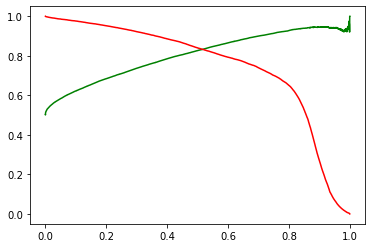

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 9.4 Making Predictions on the test set

In [128]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [129]:
X_test = X_test[col]
X_test.head()

arpu_7  onnet_mou_8  std_og_t2m_mou_8  loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  total_ic_mou_6  total_ic_mou_8  spl_ic_mou_8  total_rech_num_8  last_day_rch_amt_8  fb_user_8       aon
13919 -0.738658    -0.501973         -0.379617         -0.329408         -0.359750       -0.743394       -0.541951     -0.254206         -0.430531           -0.478531        1.0  2.020581
14983  0.352742     0.896803         -0.379488         -0.129952          0.045465        0.261834        1.166474     -0.254206          0.012016            0.467210        1.0  1.580314
9849  -0.487881    -0.054348         -0.391947         -0.296716         -0.353555       -0.403478        0.075977     -0.254206         -0.319894            0.309587        1.0 -0.153759
5742   0.812296    -0.491725         -0.399643         -0.259637          1.303023        1.197925        1.231772     -0.254206         -0.209258           -0.714967        1.0  0.909529
18501  1.207307    -0.252047         -0.399643          0.228935          6.930472        6.593602        4.587900     -0.254206          1.229020           -0.423363        0.0  0.667589

In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

13919    0.125660
14983    0.001266
9849     0.042095
5742     0.008339
18501    0.000036
3850     0.946788
25604    0.299611
1287     0.244764
26743    0.006154
28747    0.908310
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Checking the head
y_pred_1.head()

0
13919  0.125660
14983  0.001266
9849   0.042095
5742   0.008339
18501  0.000036

In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

churned         0
13919        0  0.125660
14983        0  0.001266
9849         0  0.042095
5742         0  0.008339
18501        0  0.000036

In [137]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_Prob', 'churned': 'Churned'})

In [138]:
y_pred_final['final_predicted'] = y_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.57 else 0)

In [139]:
y_pred_final.head()

Churned  Churned_Prob  final_predicted
13919        0      0.125660                0
14983        0      0.001266                0
9849         0      0.042095                0
5742         0      0.008339                0
18501        0      0.000036                0

### Evaluation Metrics for Final Cut Off Value = 0.57 (Test Set)

In [140]:
act = metrics.accuracy_score(y_pred_final.Churned, y_pred_final.final_predicted)
print ("Accuracy = ", act)

Accuracy =  0.8557541899441341


In [141]:
confusion3 = metrics.confusion_matrix(y_pred_final.Churned, y_pred_final.final_predicted )
confusion3

array([[7095, 1127],
       [ 164,  564]], dtype=int64)

In [142]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

#### Evaluation Metrics for Test set at final cutoff value of 0.57

In [143]:
snt = TP / float(TP+FN) # Sensitivity
spt = TN / float(TN+FP) # Specificity
ppvt = TP / float(TP+FP) # Positive Predictive Value
fprt = FP/ float(TN+FP) # False Positive Rate
npvt = TN / float(TN+ FN) # Negative Predictive Value

print("Sensitivity = ", snt )
print("Specificity = ", spt)
print("Positive Predictive Value = ", ppvt )
print("False Positive Rate= ", fprt )
print ("Negative Predictive Value = ", npvt)

Sensitivity =  0.7747252747252747
Specificity =  0.8629287278034542
Positive Predictive Value =  0.3335304553518628
False Positive Rate=  0.13707127219654586
Negative Predictive Value =  0.9774073563851771


In [144]:
psct = precision_score(y_pred_final.Churned, y_pred_final.final_predicted)
print("Precision_score = ", psct)

Precision_score =  0.3335304553518628


In [145]:
rcst = recall_score(y_pred_final.Churned, y_pred_final.final_predicted) 
print("Recall_score = ", rcst)

Recall_score =  0.7747252747252747


### <u>Inferences:</u>
### Let's check the overall performance of train and test sets

**Logistic Regression**

**For Train Set**

- Sensitivity/Recall : 0.840
- Specificity: 0.823

**For Test Set**
- Sensitivity/Recall : 0.774
- Specificity: 0.862

### Minority and Majority Class Classification Report : Logistic Regression

In [146]:
from sklearn.metrics import classification_report

#### For Test Set:

In [147]:
print(classification_report(y_pred_final.Churned, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8222
           1       0.33      0.77      0.47       728

    accuracy                           0.86      8950
   macro avg       0.66      0.82      0.69      8950
weighted avg       0.93      0.86      0.88      8950



#### For Train Set

In [148]:
print(classification_report(y_train_pred_final.Churned, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     19186
           1       0.85      0.81      0.83     19186

    accuracy                           0.83     38372
   macro avg       0.84      0.83      0.83     38372
weighted avg       0.84      0.83      0.83     38372



### Inference from Classification Report : Logistic Regression

- Recall is the most important metric in terms of evaluating metrics as the telecom company will be able to efficiently understand the customers who might churn in the future. 

- Precision on the other hand is less important in our case study as its not that important if some customers are mistakenly called as churned even though they might not be churning.

- we can see that **Recall** can explain **77% of actual churn cases in test set** and **77.4% of overall churn cases(Test set)** which signifies that minority class has been balanced

## Step 10: Model building using Random forest

### Class Imbalance Handling Technique used: SMOTE

In [149]:
# Perform oversampling using smote

sm = SMOTE(random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Lets see how the classes look after imbalance treatment
print("counts of label '1':",sum(y_train_sm==1))
print("counts of label '0':",sum(y_train_sm==0))

counts of label '1': 19186
counts of label '0': 19186


In [150]:
X_train2 = X_train_sm
y_train2 = y_train_sm

### 9.1 Baseline RF model

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train2, y_train2)
display(rfc.score(X_train2, y_train2))

1.0

#### Checking which features are important to Random forest Model 

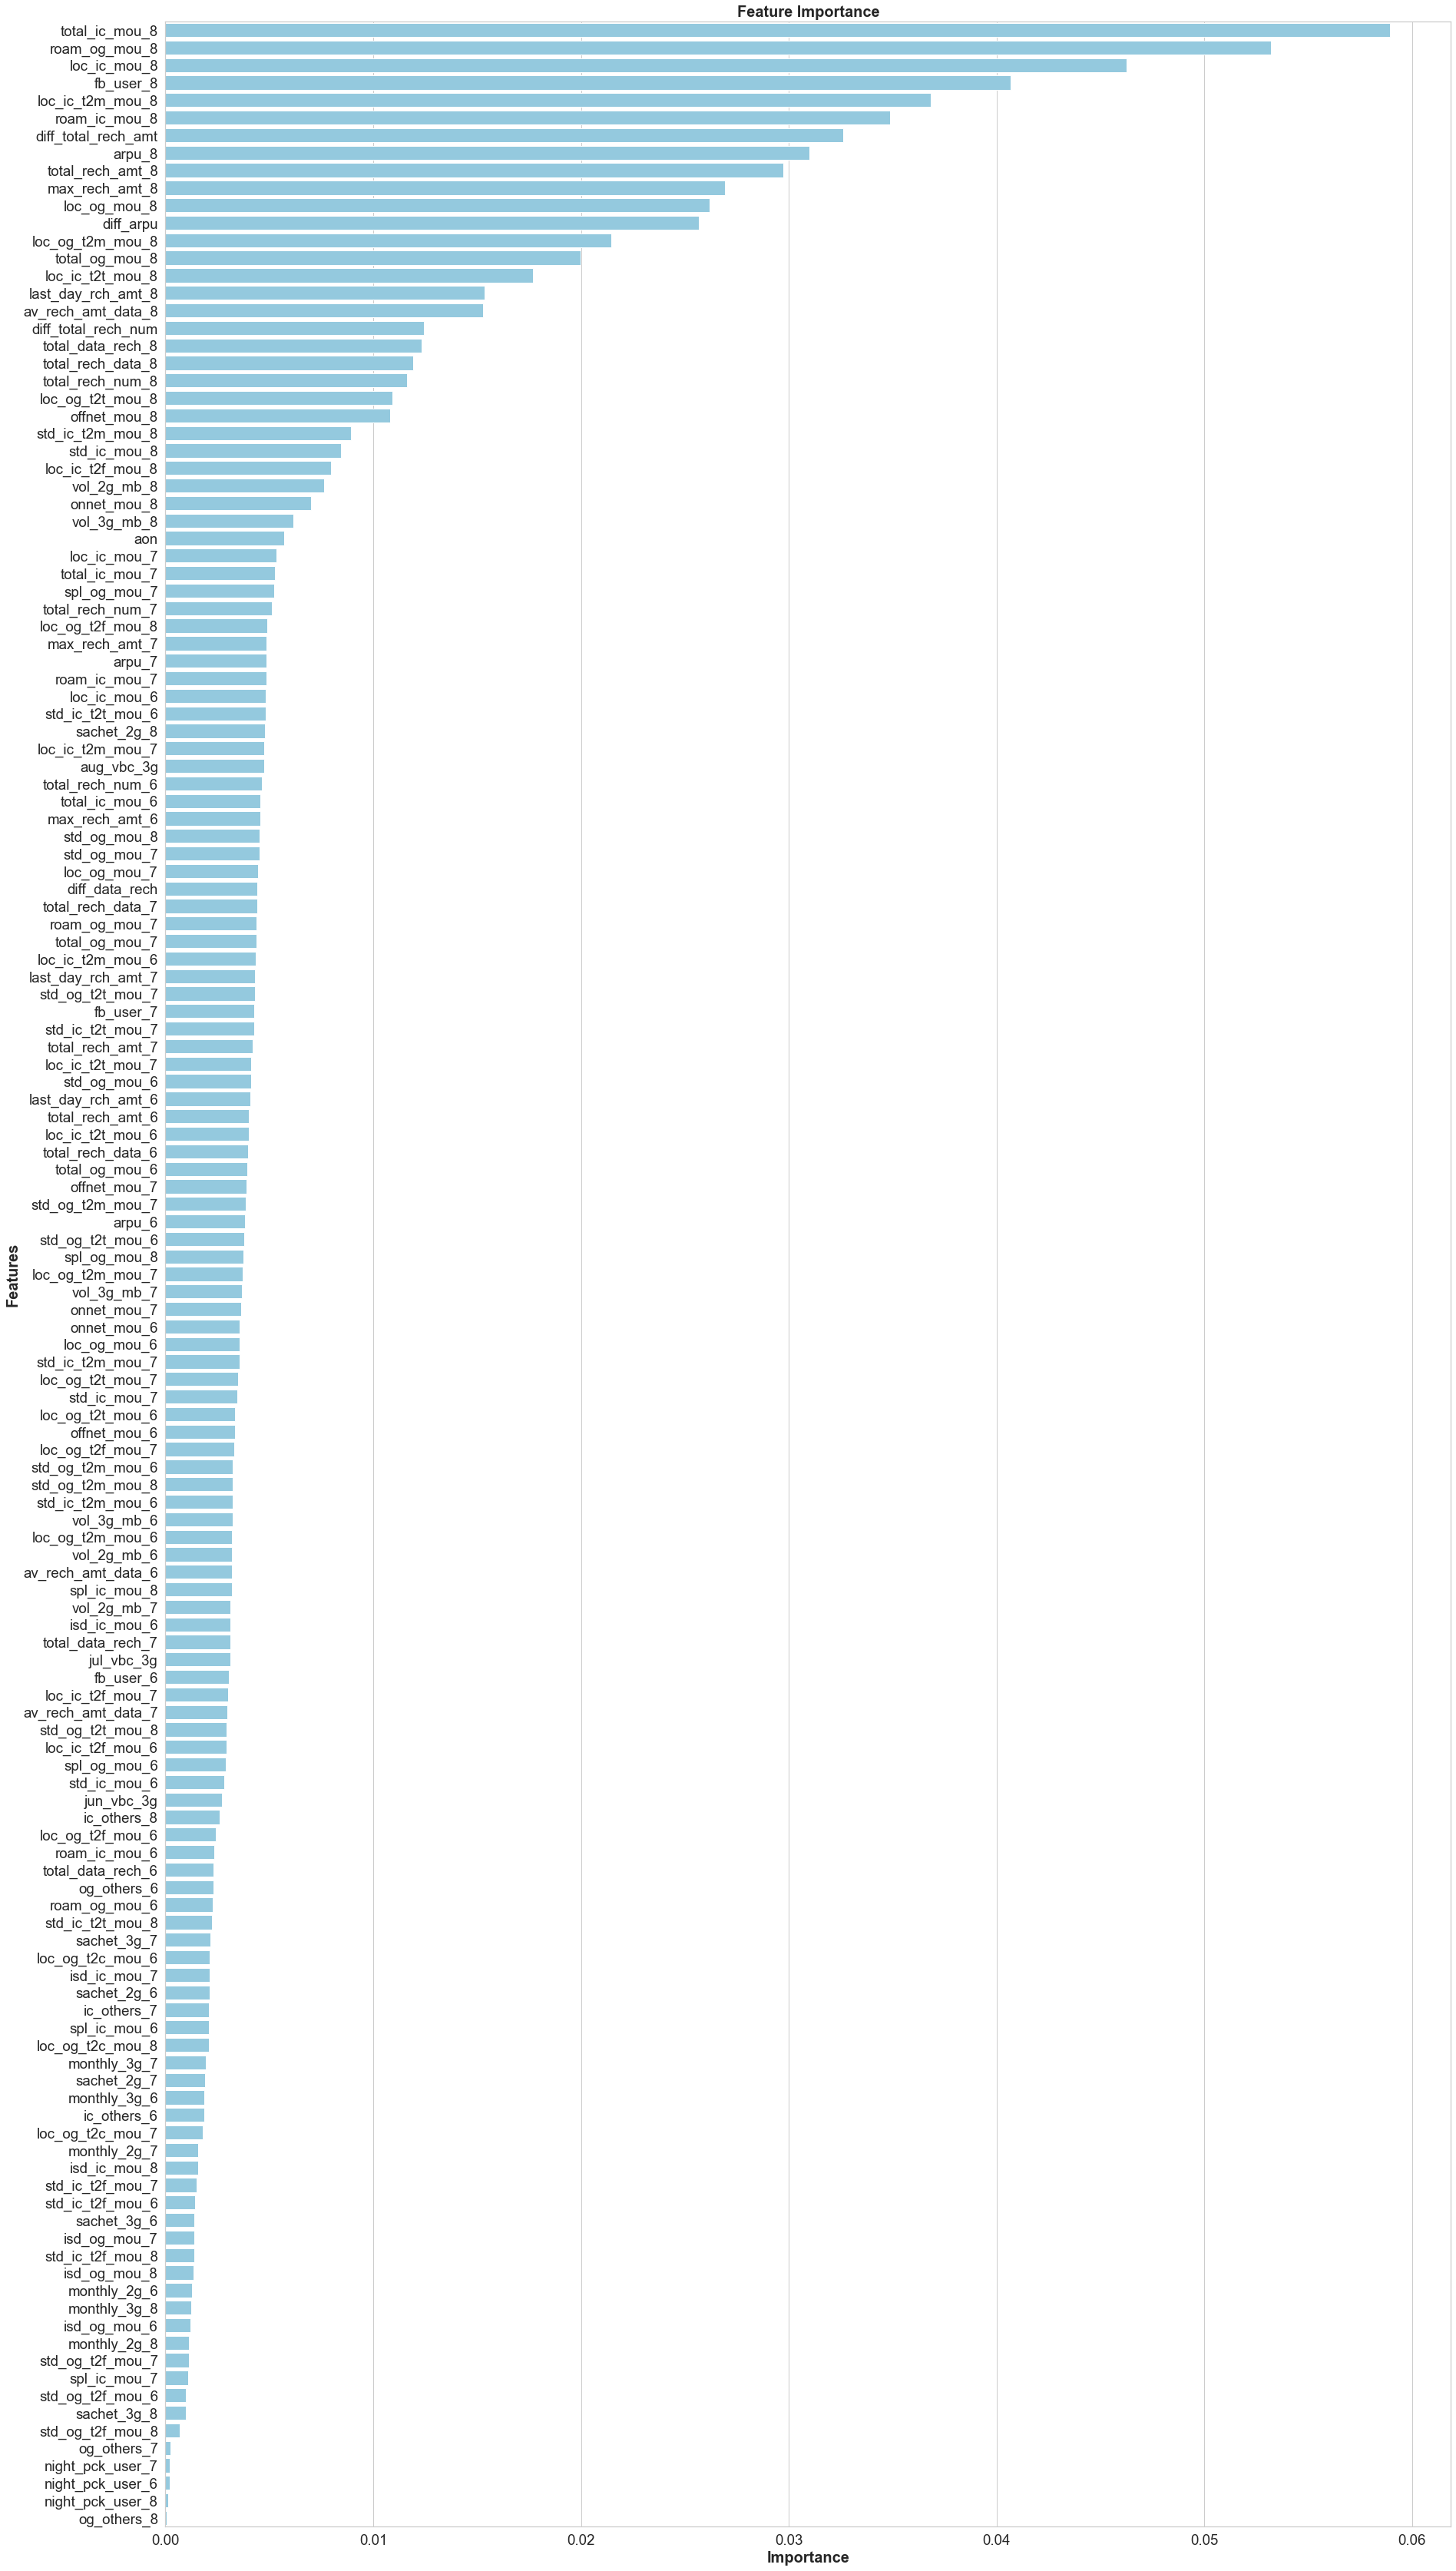

None

In [152]:
feats = {}

for feature, importance in zip(X_train2.columns, rfc.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 6)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,60)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=20, weight = 'bold')
plt.ylabel('Features', fontsize=20, weight = 'bold')
plt.title('Feature Importance', fontsize=20, weight = 'bold')
display(plt.show())

In [153]:
#to get understanding on respective importances for features using RF model.

display(importances)

Features  Gini-Importance
0         total_ic_mou_8         0.058921
1          roam_og_mou_8         0.053197
2           loc_ic_mou_8         0.046236
3              fb_user_8         0.040656
4       loc_ic_t2m_mou_8         0.036824
5          roam_ic_mou_8         0.034880
6    diff_total_rech_amt         0.032621
7                 arpu_8         0.030982
8       total_rech_amt_8         0.029730
9         max_rech_amt_8         0.026908
10          loc_og_mou_8         0.026202
11             diff_arpu         0.025673
12      loc_og_t2m_mou_8         0.021440
13        total_og_mou_8         0.019984
14      loc_ic_t2t_mou_8         0.017685
15    last_day_rch_amt_8         0.015343
16    av_rech_amt_data_8         0.015281
17   diff_total_rech_num         0.012437
18     total_data_rech_8         0.012316
19     total_rech_data_8         0.011922
20      total_rech_num_8         0.011613
21      loc_og_t2t_mou_8         0.010939
22          offnet_mou_8         0.010809
23      std_ic_t2m_mou_8         0.008941
24          std_ic_mou_8         0.008458
25      loc_ic_t2f_mou_8         0.007971
26           vol_2g_mb_8         0.007623
27           onnet_mou_8         0.006995
28           vol_3g_mb_8         0.006163
29                   aon         0.005720
30          loc_ic_mou_7         0.005342
31        total_ic_mou_7         0.005252
32          spl_og_mou_7         0.005215
33      total_rech_num_7         0.005113
34      loc_og_t2f_mou_8         0.004907
35        max_rech_amt_7         0.004876
36                arpu_7         0.004849
37         roam_ic_mou_7         0.004846
38          loc_ic_mou_6         0.004821
39      std_ic_t2t_mou_6         0.004814
40           sachet_2g_8         0.004805
41      loc_ic_t2m_mou_7         0.004767
42            aug_vbc_3g         0.004748
43      total_rech_num_6         0.004647
44        total_ic_mou_6         0.004581
45        max_rech_amt_6         0.004572
46          std_og_mou_8         0.004540
47          std_og_mou_7         0.004532
48          loc_og_mou_7         0.004459
49        diff_data_rech         0.004431
50     total_rech_data_7         0.004431
51         roam_og_mou_7         0.004392
52        total_og_mou_7         0.004387
53      loc_ic_t2m_mou_6         0.004347
54    last_day_rch_amt_7         0.004325
55      std_og_t2t_mou_7         0.004318
56             fb_user_7         0.004287
57      std_ic_t2t_mou_7         0.004258
58      total_rech_amt_7         0.004202
59      loc_ic_t2t_mou_7         0.004140
60          std_og_mou_6         0.004104
61    last_day_rch_amt_6         0.004104
62      total_rech_amt_6         0.004020
63      loc_ic_t2t_mou_6         0.004000
64     total_rech_data_6         0.003978
65        total_og_mou_6         0.003955
66          offnet_mou_7         0.003909
67      std_og_t2m_mou_7         0.003857
68                arpu_6         0.003841
69      std_og_t2t_mou_6         0.003794
70          spl_og_mou_8         0.003739
71      loc_og_t2m_mou_7         0.003708
72           vol_3g_mb_7         0.003670
73           onnet_mou_7         0.003652
74           onnet_mou_6         0.003567
75          loc_og_mou_6         0.003552
76      std_ic_t2m_mou_7         0.003550
77      loc_og_t2t_mou_7         0.003483
78          std_ic_mou_7         0.003464
79      loc_og_t2t_mou_6         0.003353
80          offnet_mou_6         0.003351
81      loc_og_t2f_mou_7         0.003304
82      std_og_t2m_mou_6         0.003248
83      std_og_t2m_mou_8         0.003245
84      std_ic_t2m_mou_6         0.003243
85           vol_3g_mb_6         0.003220
86      loc_og_t2m_mou_6         0.003204
87           vol_2g_mb_6         0.003193
88    av_rech_amt_data_6         0.003182
89          spl_ic_mou_8         0.003182
90           vol_2g_mb_7         0.003142
91          isd_ic_mou_6         0.003109
92     total_data_rech_7         0.003108
93            jul_vbc_3g         0.003107
94             fb_user_6  

## 10.2 RF Model using PCA approach

`Using PCA, we can study the cumulative explained variance ratio of these features to understand which features explain the most variance in the data.`

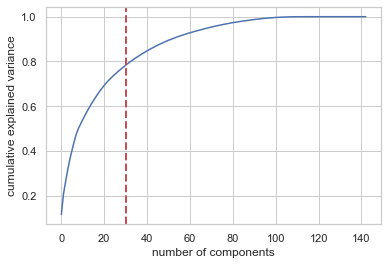

None

In [154]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components= 143)
pca_test.fit(X_train2)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=30, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

`The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.`

### Observation:

`Using this apprach, we have reduced features from 142 to 30. We could see 80% of variance is explained by 30 features as per above graph`

In [155]:
#lets understand Cumulative Variance Ratio &  Explained Variance Ratio for 30 features

display(pca_df.head(30))

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.116308                  0.116308
1                    0.207186                  0.090878
2                    0.263755                  0.056569
3                    0.316320                  0.052565
4                    0.364167                  0.047847
5                    0.403843                  0.039676
6                    0.442461                  0.038617
7                    0.476007                  0.033546
8                    0.500990                  0.024983
9                    0.520773                  0.019783
10                   0.540160                  0.019387
11                   0.558612                  0.018452
12                   0.576599                  0.017988
13                   0.593517                  0.016917
14                   0.610033                  0.016516
15                   0.625359                  0.015326
16                   0.639921                  0.014562
17                   0.654244                  0.014323
18                   0.668281                  0.014037
19                   0.680795                  0.012513
20                   0.692991                  0.012196
21                   0.704379                  0.011388
22                   0.714936                  0.010557
23                   0.724746                  0.009810
24                   0.733901                  0.009155
25                   0.742684                  0.008783
26                   0.751137                  0.008452
27                   0.759448                  0.008311
28                   0.767442                  0.007994
29                   0.775303                  0.007862

In [156]:
#this is any additional step since X_test % y_test was not getting detected by machine

X_test2 = df_test.drop('churned', axis=1)

y_test2 = df_test['churned']

In [157]:
pca = PCA(n_components=30)
pca.fit(X_train2)

X_train_scaled_pca = pca.transform(X_train2)
X_test_scaled_pca = pca.transform(X_test2)

In [158]:
#now fitting our RF model after PCA

rfc2 = RandomForestClassifier()
rfc2.fit(X_train_scaled_pca, y_train2)

display(rfc2.score(X_train_scaled_pca, y_train2))

1.0

In [159]:
#creating y_pred for baseline model

y_pred = rfc.predict(X_test2)

#creating y_pred for baseline model with PCA

y_pred_pca = rfc2.predict(X_test_scaled_pca)

## 10.3 RF model using Hyperparameter tuning (GridSearchCV)

### 10.3.1 Max Depth Tuning:

Finding the optimum values for **max_depth** and understand how the values of max_depth hyperparameter can influence the model accuracy.

In [160]:
# Performing GridSearchCV to find optimal max_depth

# Let's take the number of buckets for k-fold CV
folds = 5

# Range of parameters to build and testify the model
parameters = {'max_depth': range(10, 40, 5)}

# instantiate the model
rfc3 = RandomForestClassifier()

# Fitting the Random Forest on the training set
rfc3 = GridSearchCV(rfc3, parameters, cv=folds, scoring="accuracy", return_train_score=True)

rfc3.fit(X_train_scaled_pca, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 40, 5)},
             return_train_score=True, scoring='accuracy')

In [161]:
#GridSearchCV Scores for Max_depth

scores = rfc3.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      15.574777      1.383116         0.167950        0.052191              10  {'max_depth': 10}           0.886906           0.895765           0.890149           0.891061           0.889106         0.890597        0.002932                6            0.922663            0.919666            0.920288            0.917682            0.917356          0.919531         0.001926
1      23.777257      4.623212         0.199256        0.045352              15  {'max_depth': 15}           0.928599           0.934853           0.931066           0.937321           0.928981         0.932164        0.003402                5            0.979705            0.978923            0.980390            0.979934            0.979934          0.979777         0.000481
2      22.659843      1.537007         0.219014        0.024950              20  {'max_depth': 20}           0.940195           0.943322           0.939406           0.946182           0.939015         0.941624        0.002736                4            0.992116            0.992149            0.992280            0.992149            0.991661          0.992071         0.000213
3      23.684596      0.577051         0.213623        0.023470              25  {'max_depth': 25}           0.943713           0.944756           0.939666           0.945791           0.941100         0.943005        0.002285                3            0.997231            0.997426            0.997817            0.997296            0.998045          0.997563         0.000315
4      23.368705      4.508517         0.203464        0.024038              30  {'max_depth': 30}           0.941889           0.948534           0.940579           0.946182           0.942403         0.943917        0.002966                2            0.999348            0.999772            0.999511            0.999446            0.999707          0.999557         0.000159

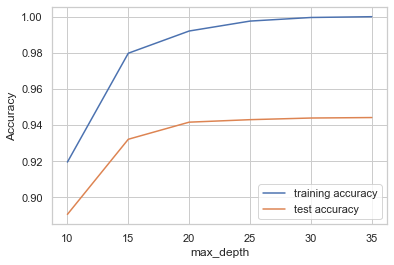

In [162]:
#Accuracy Vs. Max Depth

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

### Observation:

**max_depth of 25 looks significant in terms of stability with respect to accuracy**

It can be seen from the plot that any increase in max_depth for both train as well as test scores after it hits 25 becomes almost constant. If we try to increase the max_depth from this point onward, the Random Forest will try to overfit. Hence, controlling the depth of each of the trees will help us in reduce overfitting in the forest.

### 10.3.2 n_estimators Tuning:

This is the number of trees (**n_estimators**) you want to build before taking the maximum voting or averages of predictions. Higher number of trees give your model a better performance but it decreases the code runtime efficiency

In [163]:
# Performing GridSearchCV to find optimal n_estimators

# Let's take the number of buckets for k-fold CV
folds = 5

# Range of parameters to build and testify the model
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model
rfc3 = RandomForestClassifier(max_depth=25)

# Fitting the Random Forest on the training set
rfc3 = GridSearchCV(rfc3, parameters, cv=folds, scoring="accuracy",return_train_score=True)

rfc3.fit(X_train_scaled_pca, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=25),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [164]:
# GridSearchCV Scores for n_estimators

scores = rfc3.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                 params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      10.464822      0.513275         0.103332        0.003533                 50   {'n_estimators': 50}           0.941368           0.943453           0.940188           0.945791           0.939145         0.941989        0.002380                4            0.997068            0.997166            0.997296            0.997036            0.997264          0.997166         0.000103
1      14.460349      0.570601         0.138430        0.005916                 75   {'n_estimators': 75}           0.942410           0.947492           0.941360           0.946573           0.938624         0.943292        0.003308                3            0.997101            0.997720            0.997459            0.997361            0.997524          0.997433         0.000203
2      18.748677      0.503495         0.191289        0.014998                100  {'n_estimators': 100}           0.942932           0.946971           0.941100           0.948658           0.940448         0.944022        0.003246                2            0.996514            0.997492            0.997557            0.997361            0.997622          0.997309         0.000407
3      23.913069      0.355328         0.225804        0.003060                125  {'n_estimators': 125}           0.943974           0.946710           0.941621           0.948397           0.940970         0.944334        0.002862                1            0.997133            0.997524            0.997557            0.997394            0.998078          0.997537         0.000309

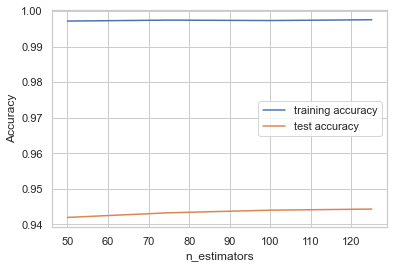

In [165]:
# Accuracy Vs. n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation:

**n_estimators of 100 looks significant in terms of stability with respect to accuracy**

As it can be seen from the plot that the n_estimators for test set increases till 100 and then reduces as we increase the n_estimators. The train set is almost equal across the entire range of n_estimators and hence, we will select till 100.

### 10.3.3 Max_features Tuning:

These are the maximum number of features Random Forest is allowed to try in individual tree. This is the max number of features that will be considered for splitting at the node

In [166]:
# Performing GridSearchCV to find optimal Max_features

# Let's take the number of buckets for k-fold CV
folds = 5

# Range of parameters to build and testify the model
parameters = {'max_features': [4, 10, 16, 20, 24]}

# instantiate the model
rfc3 = RandomForestClassifier(max_depth=25,n_estimators=100)

# Fitting the Random Forest on the training set
rfc3 = GridSearchCV(rfc3, parameters, cv=folds, scoring="accuracy",return_train_score=True)

rfc3.fit(X_train_scaled_pca, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=25),
             param_grid={'max_features': [4, 10, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [167]:
# GridSearchCV Scores for Max Features

scores = rfc3.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_features                params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      15.580945      0.332551         0.188098        0.012306                  4   {'max_features': 4}           0.944625           0.948013           0.940057           0.947615           0.941751         0.944412        0.003141                1            0.997296            0.998176            0.997915            0.997655            0.998045          0.997817         0.000312
1      36.489647      0.387734         0.187713        0.011808                 10  {'max_features': 10}           0.942410           0.943713           0.938494           0.943836           0.939666         0.941624        0.002168                2            0.996482            0.997459            0.997589            0.997231            0.997427          0.997238         0.000395
2      57.943884      0.871343         0.186702        0.012809                 16  {'max_features': 16}           0.937720           0.943322           0.936800           0.942664           0.936409         0.939383        0.002986                3            0.996645            0.997883            0.997655            0.997133            0.997492          0.997361         0.000434
3      73.583883      1.455684         0.184913        0.017942                 20  {'max_features': 20}           0.939153           0.942280           0.935757           0.938754           0.938233         0.938836        0.002089                4            0.996351            0.997101            0.997036            0.997199            0.997557          0.997049         0.000392
4      88.624070      1.967543         0.191686        0.016511                 24  {'max_features': 24}           0.933550           0.940065           0.933802           0.939145           0.935887         0.936490        0.002685                5            0.996547            0.997264            0.996873            0.996352            0.996873          0.996782         0.000313

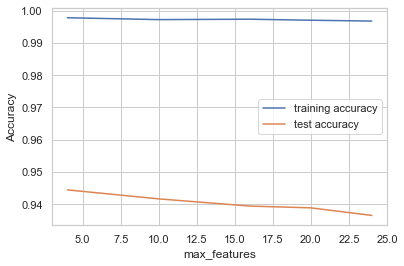

In [168]:
# Accuracy with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation:

**max_features of 5 looks significant with respect to the accuracy**
- The hyperparamter of max_features for test set is decreasing from the initial starting point but since, it will not be feasible to select something less than 5, hence we will finalize with max_features of 5. 
- Also the train set looks stable throughout the plot.

### 10.3.4 Min_samples_leaf Tuning:

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

In [169]:
# Performing GridSearchCV to find optimal Min_samples

# Let's take the number of buckets for k-fold CV
folds = 5

# Range of parameters to build and testify the model
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rfc3 = RandomForestClassifier(max_depth=25,n_estimators=100,max_features=5)

# Fitting the Random Forest on the training set
rfc3 = GridSearchCV(rfc3, parameters, cv=folds, scoring="accuracy",return_train_score=True)

rfc3.fit(X_train_scaled_pca, y_train2)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, max_features=5),
             param_grid={'min_samples_leaf': range(100, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [170]:
# GridSearchCV Scores for Min_Samples Leaf

scores = rfc3.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      12.647586      0.795036         0.120892        0.005225                    100  {'min_samples_leaf': 100}           0.832704           0.854984           0.847798           0.847537           0.848580         0.846320        0.007338                1            0.862267            0.856696            0.859698            0.857515            0.855333          0.858302         0.002436
1      11.629688      0.845314         0.131848        0.031522                    150  {'min_samples_leaf': 150}           0.826580           0.847427           0.838415           0.838806           0.840891         0.838424        0.006746                2            0.850800            0.846174            0.847319            0.846472            0.845821          0.847317         0.001810
2      10.605446      0.453162         0.104920        0.000746                    200  {'min_samples_leaf': 200}           0.817720           0.839870           0.832421           0.836982           0.831639         0.831726        0.007624                3            0.840278            0.836955            0.836537            0.839012            0.835755          0.837707         0.001677
3      10.017618      0.319350         0.109116        0.013429                    250  {'min_samples_leaf': 250}           0.812117           0.830489           0.828251           0.830857           0.824733         0.825289        0.006937                4            0.835098            0.827605            0.833572            0.833572            0.826536          0.831277         0.003496
4       9.774468      0.438619         0.098341        0.002417                    300  {'min_samples_leaf': 300}           0.811596           0.826059           0.820954           0.821214           0.824342         0.820833        0.005002                5            0.831384            0.824120            0.827025            0.826145            0.826015          0.826938         0.002417

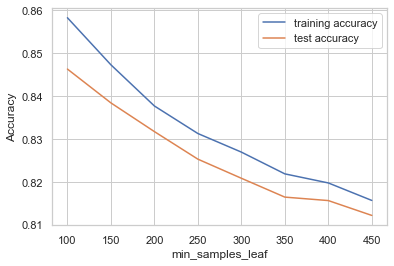

In [171]:
# Accuracy Vs. min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation:

**min_samples_leaf of 100 looks significant with respect to Accuracy**

- As it can be seen from the plot that the train as well as test split is providing the highest accuracy when the min_samples leaf is 100. 
- After this point, there is a linear decrease in points we move towards the right.

### 10.3.5 Min_samples_split Tuning:

- min_samples_split specifies the minimum number of samples required to split an internal node
- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

In [172]:
# Performing GridSearchCV to find optimal Min_samples

# Let's take the number of buckets for k-fold CV
folds = 5

# Range of parameters to build and testify the model
parameters = {'min_samples_split': range(50, 400, 50)}

# instantiate the model
rfc3 = RandomForestClassifier(max_depth=25,n_estimators=100,max_features=5,min_samples_leaf=100)


# Fitting the Random Forest on the training set
rfc3 = GridSearchCV(rfc3, parameters, cv=folds, scoring="accuracy",return_train_score=True)

rfc3.fit(X_train_scaled_pca, y_train2)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=25, max_features=5,
                                              min_samples_leaf=100),
             param_grid={'min_samples_split': range(50, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [173]:
#GridSearch CV scores of min_samples_split

scores = rfc3.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                      params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0      12.386078      0.604138         0.120877        0.003179                      50   {'min_samples_split': 50}           0.834007           0.856938           0.845582           0.847016           0.848840         0.846477        0.007371                3            0.860801            0.855230            0.857776            0.857613            0.854225          0.857129         0.002288
1      12.441745      0.427169         0.131241        0.018893                     100  {'min_samples_split': 100}           0.833876           0.855896           0.847928           0.849231           0.850274         0.847441        0.007307                1            0.860019            0.857282            0.857711            0.857939            0.856733          0.857937         0.001119
2      12.332024      0.464392         0.122665        0.009167                     150  {'min_samples_split': 150}           0.833094           0.854853           0.847146           0.847407           0.848840         0.846268        0.007155                4            0.859921            0.856077            0.858460            0.860480            0.853574          0.857702         0.002565
3      12.074121      0.244306         0.131655        0.016443                     200  {'min_samples_split': 200}           0.832704           0.855765           0.844670           0.847667           0.851577         0.846477        0.007832                2            0.859595            0.856273            0.856180            0.856245            0.856277          0.856914         0.001341
4      12.398844      0.534915         0.118292        0.008524                     250  {'min_samples_split': 250}           0.829316           0.853811           0.843628           0.845061           0.847016         0.843766        0.008025                5            0.855621            0.853829            0.855626            0.852564            0.851163          0.853761         0.001739

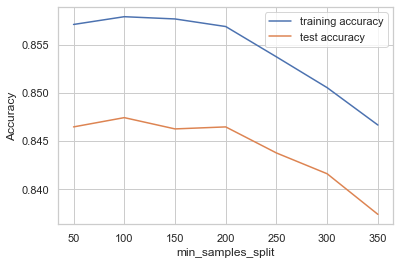

In [174]:
# plotting accuracy Vs. min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation:

**min_samples_split of 50 looks significant with respect to Accuracy**

- Even though test set looks constant till the min_samples_split is 100, we can see from the plot that the train set has increased as we moved from point 50.

### Fitting the model with the best parameters obtained

`Finding the optimal hyperparamter set by applying bootstrap method after selecting the best hyperparamters in previous steps.`

In [175]:
# Final model with the optimal hyperparameters

rfc4 = RandomForestClassifier(bootstrap=True,
                             max_depth=25,
                             min_samples_leaf=100, 
                             min_samples_split=50,
                             max_features=5,
                             n_estimators=100,
                             random_state=10)

In [176]:
# Fitting the Random Forest on the training set
rfc4_hpt= rfc4.fit(X_train_scaled_pca, y_train2)

#Predicting Random Forest on the training set
y_train_pred = rfc4_hpt.predict(X_train_scaled_pca)

In [177]:
#lets print some scores

print ("Accuracy :",metrics.accuracy_score(y_train2, y_train_pred))
print ("Recall/Sensitivity :",metrics.recall_score(y_train2, y_train_pred))

Accuracy : 0.8636245178776191
Recall/Sensitivity : 0.8372771812780152


In [178]:
#lets predict on test dataset

pred_probs_test = rfc4_hpt.predict(X_test_scaled_pca)
confusion = metrics.confusion_matrix(y_test2, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",round((metrics.roc_auc_score(y_test2, pred_probs_test)),3))
print('precision score:',round((metrics.precision_score(y_test2, pred_probs_test)),3))
print('Sensitivity/Recall :',round((TP / float(TP+FN)),3))
print('Specificity:',round((TN / float(TN+FP)),3))
print('False Positive Rate:',round((FP/ float(TN+FP)),3))
print('Positive predictive value:',round((TP / float(TP+FP)),3))
print('Negative Predictive value:',round((TN / float(TN+ FN)),3))
print("Accuracy :",round((metrics.accuracy_score(y_test2,pred_probs_test)),3))

Roc_auc_score : 0.642
precision score: 0.374
Sensitivity/Recall : 0.332
Specificity: 0.951
False Positive Rate: 0.049
Positive predictive value: 0.374
Negative Predictive value: 0.941
Accuracy : 0.9


### Observation:

#### Random Forest

Model 3 (model with Hyperparam tunning)

**For Train Set**
- Sensitivity/Recall : 0.8372

**For Test Set** 
- Sensitivity/Recall : 0.332 

### Minority and Majority Class Classification Report : Random Forest

In [179]:
print("Let's see how train set has performed in terms of majority and minority class")
print(metrics.classification_report(y_train2, y_train_pred))
print()
print("Let's see how test set has performed in terms of majority and minority class")
print(metrics.classification_report(y_test2, pred_probs_test))

Let's see how train set has performed in terms of majority and minority class
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     19186
           1       0.88      0.84      0.86     19186

    accuracy                           0.86     38372
   macro avg       0.86      0.86      0.86     38372
weighted avg       0.86      0.86      0.86     38372


Let's see how test set has performed in terms of majority and minority class
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8222
           1       0.37      0.33      0.35       728

    accuracy                           0.90      8950
   macro avg       0.66      0.64      0.65      8950
weighted avg       0.90      0.90      0.90      8950



### Inference from Classification Report : Random Forest

- Recall is the most important metric in terms of evaluating metrics but it can be seen that the Random Forest has performed very poorly in terms of recall for test set for the minority classes.

- Precision score for the test set of minority class is also not performed well by this ML model.

- The Model even though has scored good for majority class of test set and overall good performance in every metric in train set, we will not consider this model as the best model

## Conclusion from ML Model Performances:

#### Based on ML algorithm scoring and performance, we will select Logistic Regression as our best model due to its good recall score.

**Let's see both the model performance metrics one more time and see why Logistic Regression is the best model for this case study**

#### Train and test Recall score of Logistic Regression:

- Train Recall:0.834
- Test  Recall:0.738

#### Train and test Recall score of Random forest:

- Train Recall:0.837
- Test  Recall:0.332

## Importance of Recall Score:
Recall Score has been considered the main factor as it directly tells us the percentage of people who has actually churned in the entire dataset and the main objective of this case study is to find that issue only.

# Business Strategy and Recommendations

In [180]:
#lets took look at our final logistic model

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                38372
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15212.
Date:                Mon, 05 Jul 2021   Deviance:                       30424.
Time:                        18:53:51   Pearson chi2:                 4.87e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1146      0.030    -37.085      0.000      -1.173      -1.056
arpu_7                 0.4894      0.019     25.585      0.000       0.452       0.527
onnet_mou_8           -0.1904      0.020     -9.601      0.000      -0.229      -0.152
std_og_t2m_mou_8      -0.2632      0.022    -11.931      0.000      -0.306      -0.220
loc_ic_t2t_mou_7       0.2267      0.041      5.533      0.000       0.146       0.307
loc_ic_t2m_mou_7       0.1204      0.037      3.211      0.001       0.047       0.194
total_ic_mou_6         0.5481      0.032     16.877      0.000       0.484       0.612
total_ic_mou_8        -2.9685      0.061    -48.932      0.000      -3.087      -2.850
spl_ic_mou_8          -0.7910      0.046    -17.224      0.000      -0.881      -0.701
total_rech_num_8      -0.7127      0.026    -27.676      0.000      -0.763      -0.662
last_day_rch_amt_8    -0.4539      0.020    -22.971      0.000      -0.493      -0.415
fb_user_8             -1.6772      0.035    -48.311      0.000      -1.745      -1.609
aon                   -0.3913      0.018    -21.657      0.000      -0.427      -0.356
======================================================================================
"""

From above model , we could see 12 features which could make business impact

- **arpu_7:** Avg. revenue per user- month July
- **onnet_mou_8:** within network minutes of usage - month Aug
- **std_og_t2m_mou_8:** Std outgoing minutes of usage - month July
- **loc_ic_t2t_mou_7:** Local incoming Operator T to T minutes of usage - month July
- **loc_ic_t2m_mou_7:** Local incoming Operator T to other Operator Mobile minutes of usage - month July
- **total_ic_mou_6:** Total incoming minutes of usage - month June
- **total_ic_mou_8:** Total incoming minutes of usage - month Aug
- **spl_ic_mou_8:** Special calls incoming minutes of usage - month Aug
- **total_rech_num_8:** Total no of recharge month- Aug
- **last_day_rch_amt_8:** Last day recharge amount month- Aug
- **fb_user_8:** FB User month- Aug
- **aon:** Age on network

## Recommendations:

1. As we have inferred earlier that Age on network being important feature, we need to be more careful for group of people associated with operator for less than 2 years.

2. If the customer is only recieving incoming calls (loc_ic_t2t,loc_ic_t2m,total_ic) during good and action phase, but the usage of outgoing is very less, then those customers are more likely to churn.

3. To increase the outgoing usage for users, company need to plan the existing calling plans more wisely that user could use the services actively. 

4. If the number of recharges are dropping for any user, it is more likely that customer is not using the existing services very actively and will churn soon.

5. Company need to think more about loyal customers( AON beyond 3 yrs) and should reduce the service charges for all exsiting subcriptions to reduce the churn possiblity. 